# Timelines

10/02/2018

[1. Timelines](#Timelines)<br>
[2. Introduction](#Introduction)<br>
[3. Preparation](#Preparation)<br>
* [3.1 - Load libraries](#Load-libraries)<br>
* [3.2 - Load data](#Load-data)<br>
* [3.3 - Dataframe transformation](#Dataframe-transformation)<br>

[4. Overview: File structure and content](#Overview:-File-structure-and-content)<br>
[5. Individual feature visualisations](#Individual-feature-visualisations)<br>
* [5.1 - Current Gold](#Current-Gold)
* [5.2 - Jungle Minions Killed](#Jungle-Minions-Killed)
* [5.3 - Level](#Level)
* [5.4 - Minions Killed](#Minions-Killed)
* [5.5 - Position X & Y](#Position-X-&-Y)
* [5.6 - Total of Gold](#Total-of-Gold)
* [5.7 - XP](#XP)
* [5.8 - Assiting ParticipantIds](#Assisting-participantIds)
* [5.9 - Building Type](#Building-type)
* [5.10 - Creator ID](#Creator-ID)
* [5.11 - Item ID](#Item-ID)
* [5.12 - Killer ID](#Killer-ID)
* [5.13 - Lane Type](#Lane-Type)
* [5.14 - Monster Type](#Monster-Type)
* [5.15 - Position](#Position)
* [5.16 - Team ID](#Team-ID)
* [5.17 - Tower Type](#Tower-Type)
* [5.18 - Type](#Type)
* [5.19 - Victim ID](#Victim-ID)
* [5.20 - Ward Type](#Ward-Type)
* [5.21 - Max Jungle Minions Killed](#Max-Jungle-Minions-Killed)
* [5.22 - Max Minions Killed](#Max-Minions-Killed)

<img src="img/picture.png" title="Title text" />

# Introduction

This is a report for the timelines exercice with Decision Tree algorithm. 

The aim of this exercice is to **predict the number of gold of a player at the end of a game**. <br>
The data was collected from a previous game. As we will see, the dataset is small and easily accessible without requiring much memory or computing power. <br>
This exercice is perfect for data manipulation and model trainning.

The data comes in a single file: "timelines" (details of actions made by a player during the game). <br>
The data is based on the time of a single game. A game is divide in 29 frames corresponding of a snapshot of player details. <br>
The snapshot interval is 1 minute. Each frames contain two parts: "ParticipantFrames" & "events". The first one provide  static player informations: 
>- **id** (player identification);
>- **minionsKilled** (number of monster killed);
>- **totalGold** (total of gold earned);
>- **level** (current lvl);
>- **xp** (number of xp earned);
>- **currentGold** (total of gold not spend);
>- **position** (current position);
>- **jungleMinionsKilled** (number of jungle monster killed).
    
The second (events) provides informations of events made by players during the frame interval.

# Preparation

## Load Libraries

We load a range of libraries for general data manipulation and model application

In [1]:
# Import section

import json # Handle JSON format
import pandas as pd # Data manipulation
import numpy as np # Data manipulation
from pandas.io.json import json_normalize # Package for flattening json in pandas df

import plotly # Data visualisation
from plotly import tools # Data visualisation
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Data visualisation
import plotly.graph_objs as go # Data visualisation

plotly.offline.init_notebook_mode() # Data visualisation

## Load data

We use **json.load** function to load the json file, and **json_normalized** to create a dataframe. <br>
The dataframe contain 3 features (events: list of dict, participantFrames: dict, timestamp) and 29 rows (each frames).

In [2]:
# Read the json file and load the file in variable d
with open(r'/home/cros/Documents/Ritesh_Project/1522726741_timelines/1522726741_timelines.json') as f:
    d = json.load(f)

In [3]:
# Create DataFrame with Json file
frames_data = json_normalize(d, record_path=['frames'])

# Display first 5 rows of the DataFrame
frames_data.head(5)

events  \
0                                                 []   
1  [{'participantId': 5, 'itemId': 3303, 'type': ...   
2                                                 []   
3  [{'creatorId': 10, 'type': 'WARD_PLACED', 'tim...   
4  [{'creatorId': 9, 'type': 'WARD_PLACED', 'time...   

                                   participantFrames  timestamp  
0  {'1': {'participantId': 1, 'minionsKilled': 0,...          0  
1  {'1': {'participantId': 1, 'minionsKilled': 0,...      60014  
2  {'1': {'participantId': 1, 'minionsKilled': 0,...     120031  
3  {'1': {'participantId': 1, 'minionsKilled': 3,...     180053  
4  {'1': {'participantId': 1, 'minionsKilled': 8,...     240055

In [4]:
frames_data.shape

(29, 3)

This DataFrame isn't clear enough. We want to access *events & participantFrames* details.

## Dataframe tranformation

We use **json_normalized** to create events & participantFrames dataframe.

In [5]:
# Create DataFrame for "events" parts with the timestamp column
events_data = json_normalize(d['frames'], record_path='events')

# Display the 5 first rows of the DataFrame
events_data.head(5)

assistingParticipantIds buildingType  creatorId  itemId  killerId laneType  \
0                     NaN          NaN        NaN  3303.0       NaN      NaN   
1                     NaN          NaN        NaN  1054.0       NaN      NaN   
2                     NaN          NaN        NaN  2003.0       NaN      NaN   
3                     NaN          NaN        NaN  3340.0       NaN      NaN   
4                     NaN          NaN        NaN  2044.0       NaN      NaN   

  monsterType  participantId position  teamId  timestamp towerType  \
0         NaN            5.0      NaN     NaN       7454       NaN   
1         NaN            7.0      NaN     NaN       9243       NaN   
2         NaN            7.0      NaN     NaN      10025       NaN   
3         NaN            7.0      NaN     NaN      10285       NaN   
4         NaN            5.0      NaN     NaN      10350       NaN   

             type  victimId wardType  
0  ITEM_PURCHASED       NaN      NaN  
1  ITEM_PURCHASED       NaN      NaN  
2  ITEM_PURCHASED       NaN      NaN  
3  ITEM_PURCHASED       NaN      NaN  
4  ITEM_PURCHASED       NaN      NaN

In [6]:
events_data.shape

(466, 15)

In [7]:
# Create DataFrame for "participantFrames" parts
liste = []

for len_participantFrames in range(0,len(d['frames'])):
    for id in range(1,11):
        data = d['frames'][len_participantFrames]['participantFrames'][str(id)]
        data['timestamp'] = d['frames'][len_participantFrames]['timestamp']
        liste.append(data)
                      
participantFrames_data = json_normalize(liste)

participantFrames_data.head(5)

currentGold  jungleMinionsKilled  level  minionsKilled  participantId  \
0          475                    0      1              0              1   
1          475                    0      1              0              2   
2          475                    0      1              0              3   
3          475                    0      1              0              4   
4          515                    0      1              0              5   

   position.x  position.y  timestamp  totalGold  xp  
0       192.0       383.0          0        475   0  
1       192.0       163.0          0        475   0  
2       -17.0        95.0          0        475   0  
3      -147.0       273.0          0        475   0  
4       -57.0       451.0          0        515   0

In [8]:
participantFrames_data.shape

(290, 10)

The final dataframe will be a merging of the two dataframes. <br>
And set `participantId` as index of the dataframe.

In [9]:
# Merge the two DataFrames on timestamp
df_uc1 = pd.merge(participantFrames_data, events_data, how='outer', on=['participantId', 'timestamp'])

# Sort ascending on column participantId and timestamp
# We only can do this when it is int value
df_uc1.sort_values(by=['participantId'], ascending=True, inplace=True)

#df_uc1 = df_uc1.set_index('participantId') # Set participantId as index

df_uc1.head(5)

currentGold  jungleMinionsKilled  level  minionsKilled  participantId  \
398          NaN                  NaN    NaN            NaN            0.0   
399          NaN                  NaN    NaN            NaN            0.0   
400          NaN                  NaN    NaN            NaN            0.0   
401          NaN                  NaN    NaN            NaN            0.0   
402          NaN                  NaN    NaN            NaN            0.0   

     position.x  position.y  timestamp  totalGold  xp   ...     itemId  \
398         NaN         NaN     420120        NaN NaN   ...     1501.0   
399         NaN         NaN     420120        NaN NaN   ...     1501.0   
400         NaN         NaN     420120        NaN NaN   ...     1501.0   
401         NaN         NaN     420120        NaN NaN   ...     1501.0   
402         NaN         NaN     420120        NaN NaN   ...     1501.0   

    killerId  laneType  monsterType  position teamId towerType  \
398      NaN       NaN          NaN       NaN    NaN       NaN   
399      NaN       NaN          NaN       NaN    NaN       NaN   
400      NaN       NaN          NaN       NaN    NaN       NaN   
401      NaN       NaN          NaN       NaN    NaN       NaN   
402      NaN       NaN          NaN       NaN    NaN       NaN   

               type  victimId wardType  
398  ITEM_DESTROYED       NaN      NaN  
399  ITEM_DESTROYED       NaN      NaN  
400  ITEM_DESTROYED       NaN      NaN  
401  ITEM_DESTROYED       NaN      NaN  
402  ITEM_DESTROYED       NaN      NaN  

[5 rows x 23 columns]

In [10]:
df_uc1.shape

(756, 23)

# Overview: File structure and content

As a first step let's have an overview of the data sets using the describe, info & shape tools.

In [11]:
df_uc1.describe()

currentGold  jungleMinionsKilled       level  minionsKilled  \
count   290.000000           290.000000  290.000000     290.000000   
mean    666.044828             8.875862    8.375862      53.131034   
std     550.129951            19.552744    4.368823      54.276016   
min       0.000000             0.000000    1.000000       0.000000   
25%     277.500000             0.000000    5.000000       7.000000   
50%     536.000000             0.000000    9.000000      28.000000   
75%     900.500000             5.000000   12.000000     102.750000   
max    3337.000000            88.000000   16.000000     174.000000   

       participantId    position.x    position.y     timestamp    totalGold  \
count     601.000000    280.000000    280.000000  7.560000e+02    290.00000   
mean        5.462562   6010.385714   5595.321429  8.401571e+05   4597.37931   
std         2.897530   4100.695767   4060.752538  4.868353e+05   3290.79392   
min         0.000000   -147.000000     95.000000  0.000000e+00    475.00000   
25%         3.000000   2489.750000   2010.250000  4.201550e+05   1725.25000   
50%         6.000000   5857.000000   4697.000000  8.553190e+05   3984.50000   
75%         8.000000   9922.750000   8541.000000  1.260525e+06   6948.25000   
max        10.000000  14146.000000  14358.000000  1.680707e+06  12935.00000   

                 xp  creatorId       itemId   killerId      teamId   victimId  
count    290.000000  72.000000   311.000000  83.000000   13.000000  62.000000  
mean    5867.848276   6.000000  1994.292605   5.746988  107.692308   5.129032  
std     4386.754710   2.727017   864.727860   2.925262   27.735010   2.760873  
min        0.000000   1.000000  1001.000000   0.000000  100.000000   1.000000  
25%     1966.750000   4.000000  1040.500000   3.000000  100.000000   3.000000  
50%     5286.500000   6.000000  2003.000000   7.000000  100.000000   5.000000  
75%     9084.500000   8.000000  3057.000000   8.000000  100.000000   7.000000  
max    16074.000000  10.000000  3401.000000  10.000000  200.000000  10.000000

In [12]:
df_uc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 398 to 755
Data columns (total 23 columns):
currentGold                290 non-null float64
jungleMinionsKilled        290 non-null float64
level                      290 non-null float64
minionsKilled              290 non-null float64
participantId              601 non-null float64
position.x                 280 non-null float64
position.y                 280 non-null float64
timestamp                  756 non-null int64
totalGold                  290 non-null float64
xp                         290 non-null float64
assistingParticipantIds    75 non-null object
buildingType               13 non-null object
creatorId                  72 non-null float64
itemId                     311 non-null float64
killerId                   83 non-null float64
laneType                   13 non-null object
monsterType                3 non-null object
position                   78 non-null object
teamId                     13 non-null float

There are 756 different rows in the dataset. This is a small dataset. <br>
`timestamp` field is in milliseconds. It difficult to interpret it like this. We will convert it in seconds

In [13]:
df_uc1.shape

(756, 23)

In [14]:
# Convert seconde function
def convertSec(millis):
    minutes=(millis/(1000*60))%60
    minutes=format(minutes, '.2f')
    return minutes

In [15]:
# Loop to convert all value to timestamp
for i in range(0,len(df_uc1)):
    df_uc1.loc[i,'timestamp'] = convertSec(df_uc1.loc[i,'timestamp'])    

In [16]:
df_uc1.head(10)

currentGold  jungleMinionsKilled  level  minionsKilled  participantId  \
398          NaN                  NaN    NaN            NaN            0.0   
399          NaN                  NaN    NaN            NaN            0.0   
400          NaN                  NaN    NaN            NaN            0.0   
401          NaN                  NaN    NaN            NaN            0.0   
402          NaN                  NaN    NaN            NaN            0.0   
403          NaN                  NaN    NaN            NaN            0.0   
303          NaN                  NaN    NaN            NaN            1.0   
302          NaN                  NaN    NaN            NaN            1.0   
299          NaN                  NaN    NaN            NaN            1.0   
280        238.0                  1.0   16.0          163.0            1.0   

     position.x  position.y timestamp  totalGold       xp   ...     itemId  \
398         NaN         NaN      7.00        NaN      NaN   ...     1501.0   
399         NaN         NaN      7.00        NaN      NaN   ...     1501.0   
400         NaN         NaN      7.00        NaN      NaN   ...     1501.0   
401         NaN         NaN      7.00        NaN      NaN   ...     1501.0   
402         NaN         NaN      7.00        NaN      NaN   ...     1501.0   
403         NaN         NaN      7.00        NaN      NaN   ...     1501.0   
303         NaN         NaN      0.21        NaN      NaN   ...     2003.0   
302         NaN         NaN      0.20        NaN      NaN   ...     2003.0   
299         NaN         NaN      0.20        NaN      NaN   ...     1029.0   
280         NaN         NaN     28.01     8883.0  16074.0   ...        NaN   

    killerId  laneType  monsterType  position teamId towerType  \
398      NaN       NaN          NaN       NaN    NaN       NaN   
399      NaN       NaN          NaN       NaN    NaN       NaN   
400      NaN       NaN          NaN       NaN    NaN       NaN   
401      NaN       NaN          NaN       NaN    NaN       NaN   
402      NaN       NaN          NaN       NaN    NaN       NaN   
403      NaN       NaN          NaN       NaN    NaN       NaN   
303      NaN       NaN          NaN       NaN    NaN       NaN   
302      NaN       NaN          NaN       NaN    NaN       NaN   
299      NaN       NaN          NaN       NaN    NaN       NaN   
280      NaN       NaN          NaN       NaN    NaN       NaN   

               type  victimId wardType  
398  ITEM_DESTROYED       NaN      NaN  
399  ITEM_DESTROYED       NaN      NaN  
400  ITEM_DESTROYED       NaN      NaN  
401  ITEM_DESTROYED       NaN      NaN  
402  ITEM_DESTROYED       NaN      NaN  
403  ITEM_DESTROYED       NaN      NaN  
303  ITEM_PURCHASED       NaN      NaN  
302  ITEM_PURCHASED       NaN      NaN  
299  ITEM_PURCHASED       NaN      NaN  
280             NaN       NaN      NaN  

[10 rows x 23 columns]

We find: 
* Participant 0 exist, but with only 6 lines, A game of League of legend is 5 players against 5 players. With participant 0 we have 11 participants. We can thinks participant 0 is an error and need to be delete.
* ParticipantId, creatorId, itemId, killerId, teamId & victimId are float type instead of int. We will need to change the type of this features. 

# Individual feature visualisations

Here we have a first look at the distributions of the feature in our individual data files before combining them for a more detailed analysis. <br>
This inital visualisation will be the foundation on wich we build our analysis

## Current Gold 

We start with the current gold of players. Here we plot the number of current gold of a player by minutes. 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]  [ (1,4) x4,y1 ]  [ (1,5) x5,y1 ]
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]  [ (2,3) x3,y2 ]  [ (2,4) x4,y2 ]  [ (2,5) x5,y2 ]



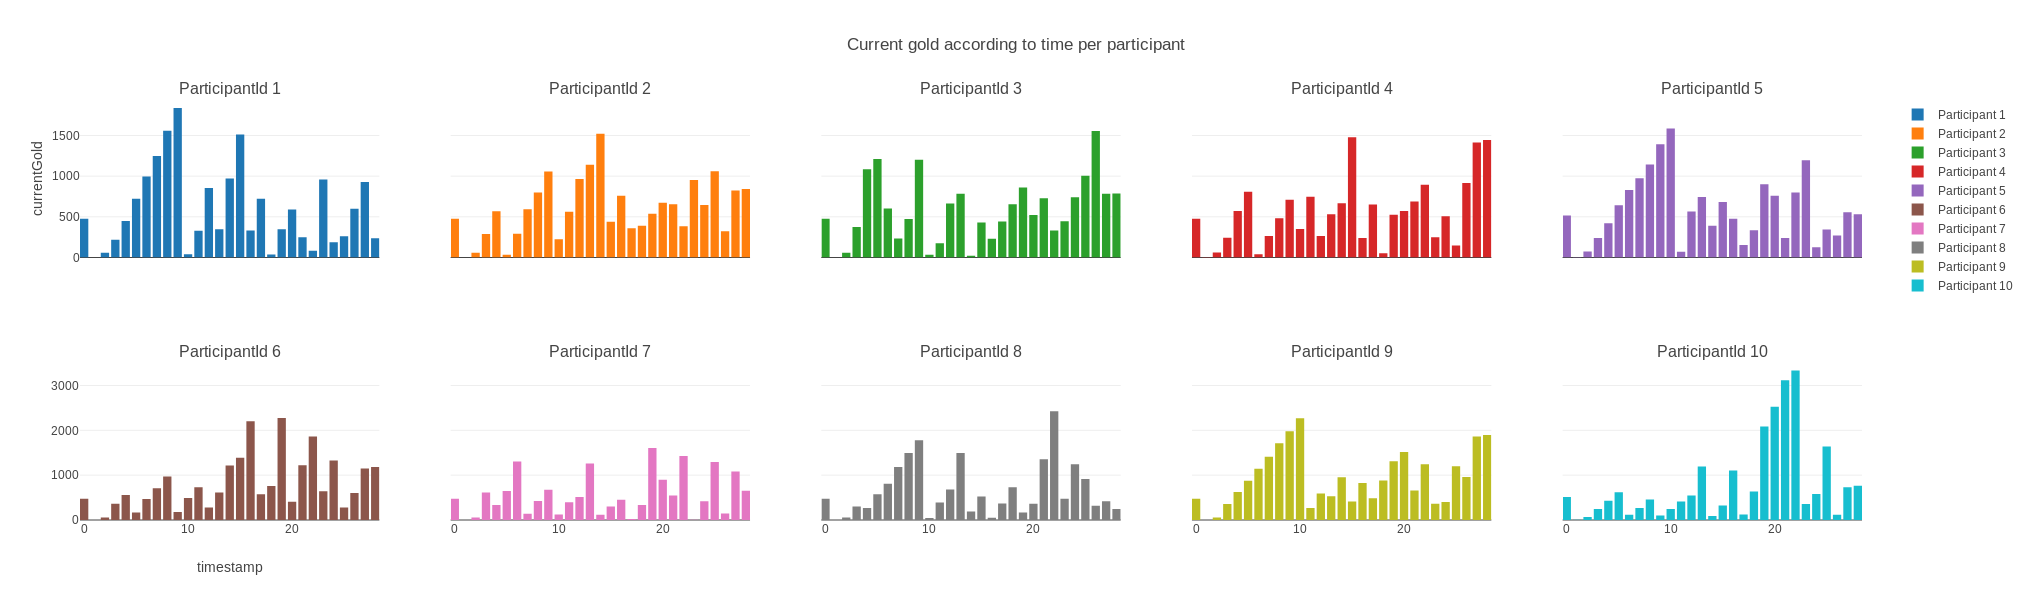

In [17]:
trace1= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 1].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 1].currentGold,
               width = 0.8,
               name='Participant 1')

trace2= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 2].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 2].currentGold,
               width = 0.8,
               name='Participant 2')

trace3= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 3].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 3].currentGold,
               width = 0.8,
               name='Participant 3')

trace4= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 4].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 4].currentGold,
               width = 0.8,
               name='Participant 4')

trace5= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 5].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 5].currentGold,
               width = 0.8,
               name='Participant 5')

trace6= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 6].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 6].currentGold,
               width = 0.8,
               name='Participant 6')

trace7= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 7].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 7].currentGold,
               width = 0.8,
               name='Participant 7')

trace8= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 8].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 8].currentGold,
               width = 0.8,
               name='Participant 8')

trace9= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 9].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 9].currentGold,
               width = 0.8,
               name='Participant 9')

trace10= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 10].timestamp, 
                y=df_uc1.loc[df_uc1['participantId'] == 10].currentGold,
                width = 0.8,
                name='Participant 10')

fig = tools.make_subplots(rows=2, cols=5, shared_xaxes=True, shared_yaxes=True, subplot_titles=('ParticipantId 1', 'ParticipantId 2', 'ParticipantId 3', 'ParticipantId 4', 'ParticipantId 5',
                                                                                                'ParticipantId 6', 'ParticipantId 7', 'ParticipantId 8', 'ParticipantId 9', 'ParticipantId 10'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 1, 5)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 3)
fig.append_trace(trace9, 2, 4)
fig.append_trace(trace10, 2, 5)

fig['layout'].update(height=600, width=2000, title='Current gold according to time per participant')
fig.layout.yaxis.update({'title': 'currentGold'})
fig.layout.xaxis.update({'title': 'timestamp'})
plotly.offline.iplot(fig, filename='currentGold-timestamp-participantId')

We find:
* Players like 1, 5, 8 & 9 make lots of gold in 10 minutes to spend it; 
* Other players like 2, 3, 4, 6 & 7 spend their Gold regurlarly;
* Player 10 doesn't have much gold until 20min.

## Jungle Minions Killed

Let's see the number of jungle minions killed by participants.

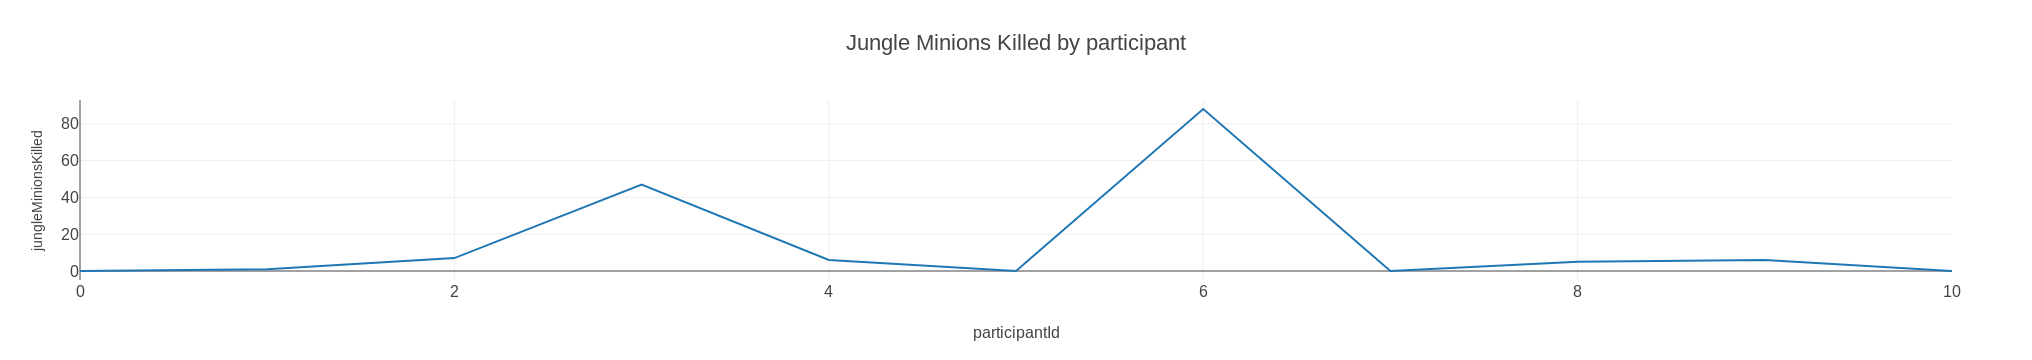

In [18]:
max_jungleMinionsKilled = df_uc1

max_jungleMinionsKilled['max_jungleMinionsKilled'] = 0

for i in range(1,10):
    max_jungleMinionsKilled.loc[max_jungleMinionsKilled.participantId == i, 'max_jungleMinionsKilled'] = max_jungleMinionsKilled.loc[max_jungleMinionsKilled.participantId == i, 'jungleMinionsKilled'].max()

plotly.offline.iplot({'data': [{'x':max_jungleMinionsKilled.participantId, 'y':max_jungleMinionsKilled.max_jungleMinionsKilled}], 
                      'layout': {'title': 'Jungle Minions Killed by participant',
                                 'font': dict(size=16),
                                 'xaxis': dict(title= 'participantId', titlefont= dict( size=16)),
                                 'yaxis': dict(title= 'jungleMinionsKilled', titlefont= dict( size=14))}})

We find:

* Player 3 & 6 killed much more jungle minions than other;
* Other player do not killed a lot of jungle minions.

## Level

See the level of participant by timestamp

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]  [ (1,4) x4,y1 ]  [ (1,5) x5,y1 ]
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]  [ (2,3) x3,y2 ]  [ (2,4) x4,y2 ]  [ (2,5) x5,y2 ]



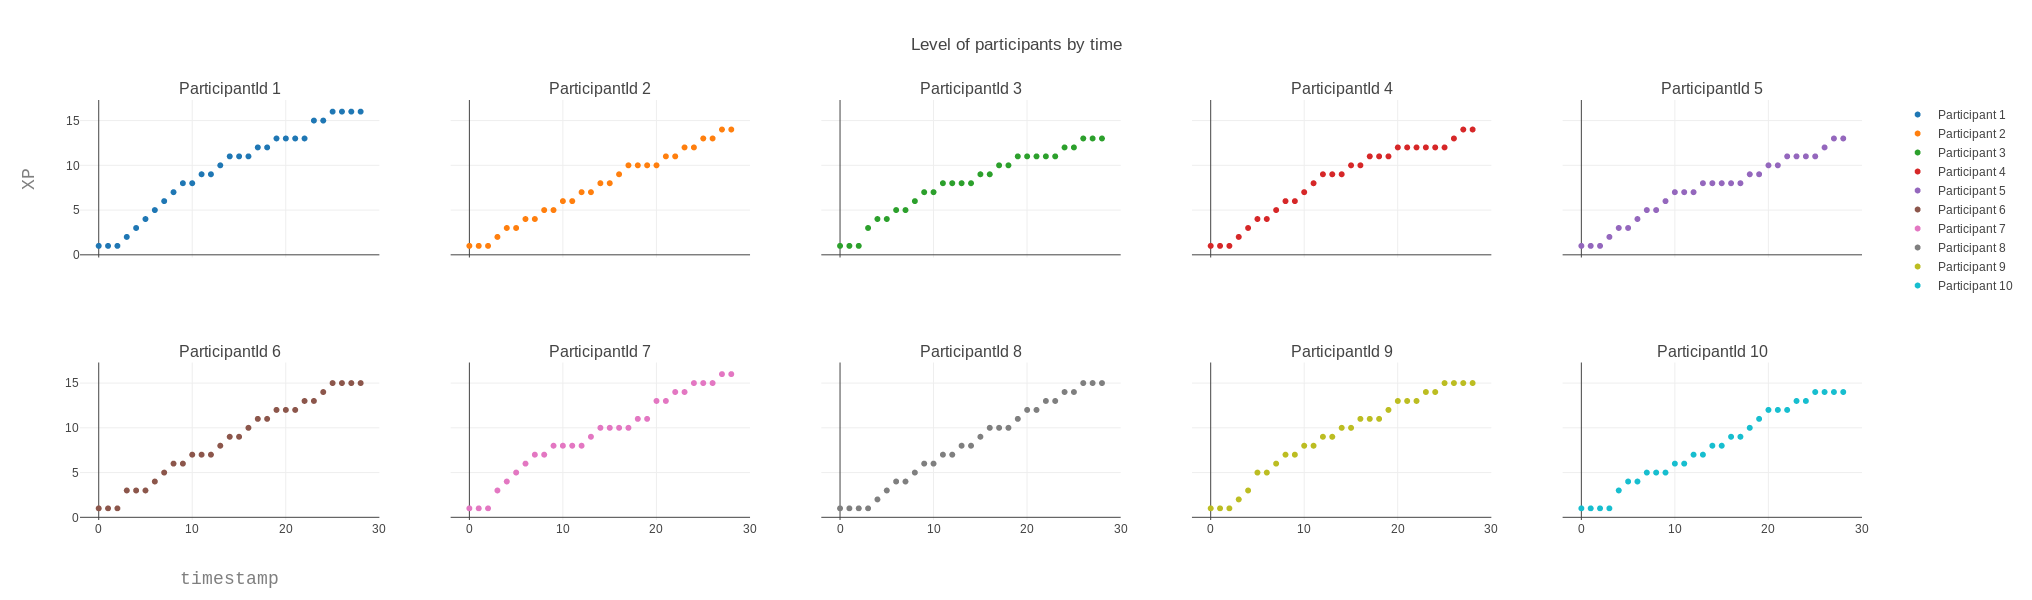

In [19]:
trace1= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 1].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 1].level,
                   name='Participant 1',
                   mode = 'markers')

trace2= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 2].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 2].level,
                   name='Participant 2',
                   mode = 'markers')

trace3= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 3].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 3].level,
                   name='Participant 3',
                   mode = 'markers')

trace4= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 4].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 4].level,
                   name='Participant 4',
                   mode = 'markers')

trace5= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 5].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 5].level,
                   name='Participant 5',
                   mode = 'markers')

trace6= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 6].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 6].level,
                   name='Participant 6',
                   mode = 'markers')

trace7= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 7].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 7].level,
                   name='Participant 7',
                   mode = 'markers')

trace8= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 8].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 8].level,
                   name='Participant 8',
                   mode = 'markers')

trace9= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 9].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 9].level,
                   name='Participant 9',
                   mode = 'markers')

trace10= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 10].timestamp, 
                    y=df_uc1.loc[df_uc1['participantId'] == 10].level,
                    name='Participant 10',
                    mode = 'markers')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

fig = tools.make_subplots(rows=2, cols=5, shared_xaxes=True, shared_yaxes=True, subplot_titles=('ParticipantId 1', 'ParticipantId 2', 'ParticipantId 3', 'ParticipantId 4', 'ParticipantId 5',
                                                                                                'ParticipantId 6', 'ParticipantId 7', 'ParticipantId 8', 'ParticipantId 9', 'ParticipantId 10'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 1, 5)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 3)
fig.append_trace(trace9, 2, 4)
fig.append_trace(trace10, 2, 5)

fig['layout'].update(height=600, width=2000, title='Level of participants by time', 
                     xaxis = dict(
                         title='timestamp (minutes)',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='level',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

fig.layout.yaxis.update({'title': 'XP'})
fig.layout.xaxis.update({'title': 'timestamp'})
plotly.offline.iplot(fig, filename='currentGold-timestamp-participantId')

We find: 
* All level of player increase in the same way;
* At the end of the game min level player and max level player have only 3 levels difference.

## Minions Killed

See the amount of minions killed by players.

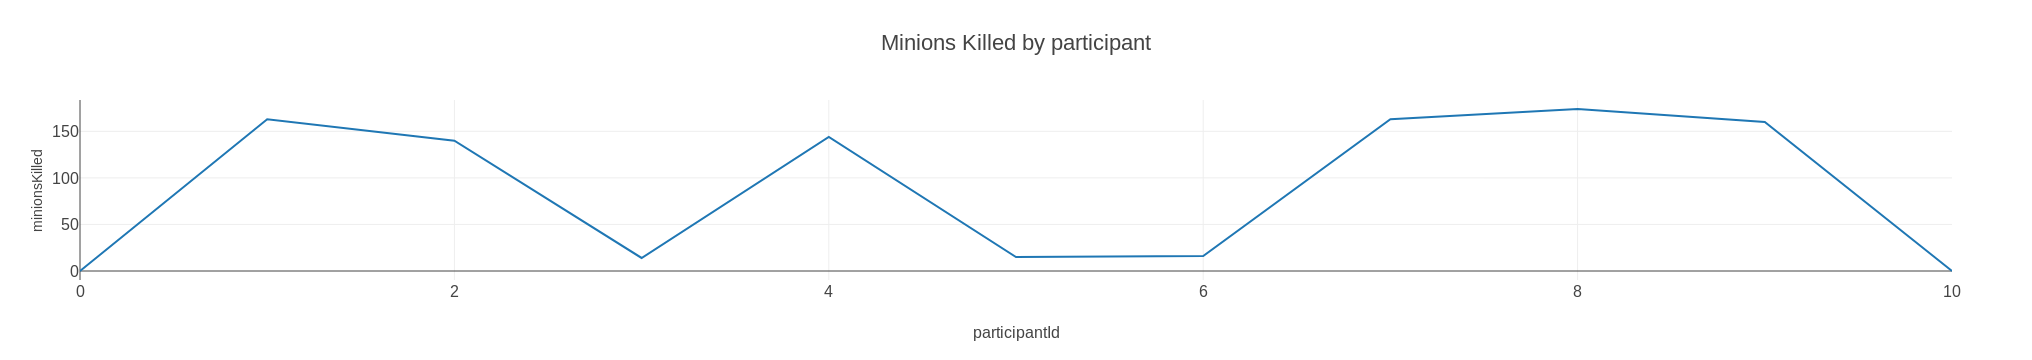

In [20]:
max_minionsKilled = df_uc1

max_minionsKilled['max_minionsKilled'] = 0

for i in range(1,10):
    max_minionsKilled.loc[max_minionsKilled.participantId == i, 'max_minionsKilled'] = max_minionsKilled.loc[max_minionsKilled.participantId == i, 'minionsKilled'].max()

plotly.offline.iplot({'data': [{'x':max_minionsKilled.participantId, 'y':max_minionsKilled.max_minionsKilled}], 
                      'layout': {'title': 'Minions Killed by participant',
                                 'font': dict(size=16),
                                 'xaxis': dict(title= 'participantId', titlefont= dict( size=16)),
                                 'yaxis': dict(title= 'minionsKilled', titlefont= dict( size=14))}})

We find:
* Player 3 & 6 do not killed much minions. If we refer to [5.2 Jungle Minions Killed](#Jungle-Minions-Killed), player 3 & 6 killed much more jungle minions;
* Player 5 & 10 do not killed much minions and jungle minions eather;
* Other player killed almost 100 minions.

## Position X & Y

See the postion of player during the game in the game map

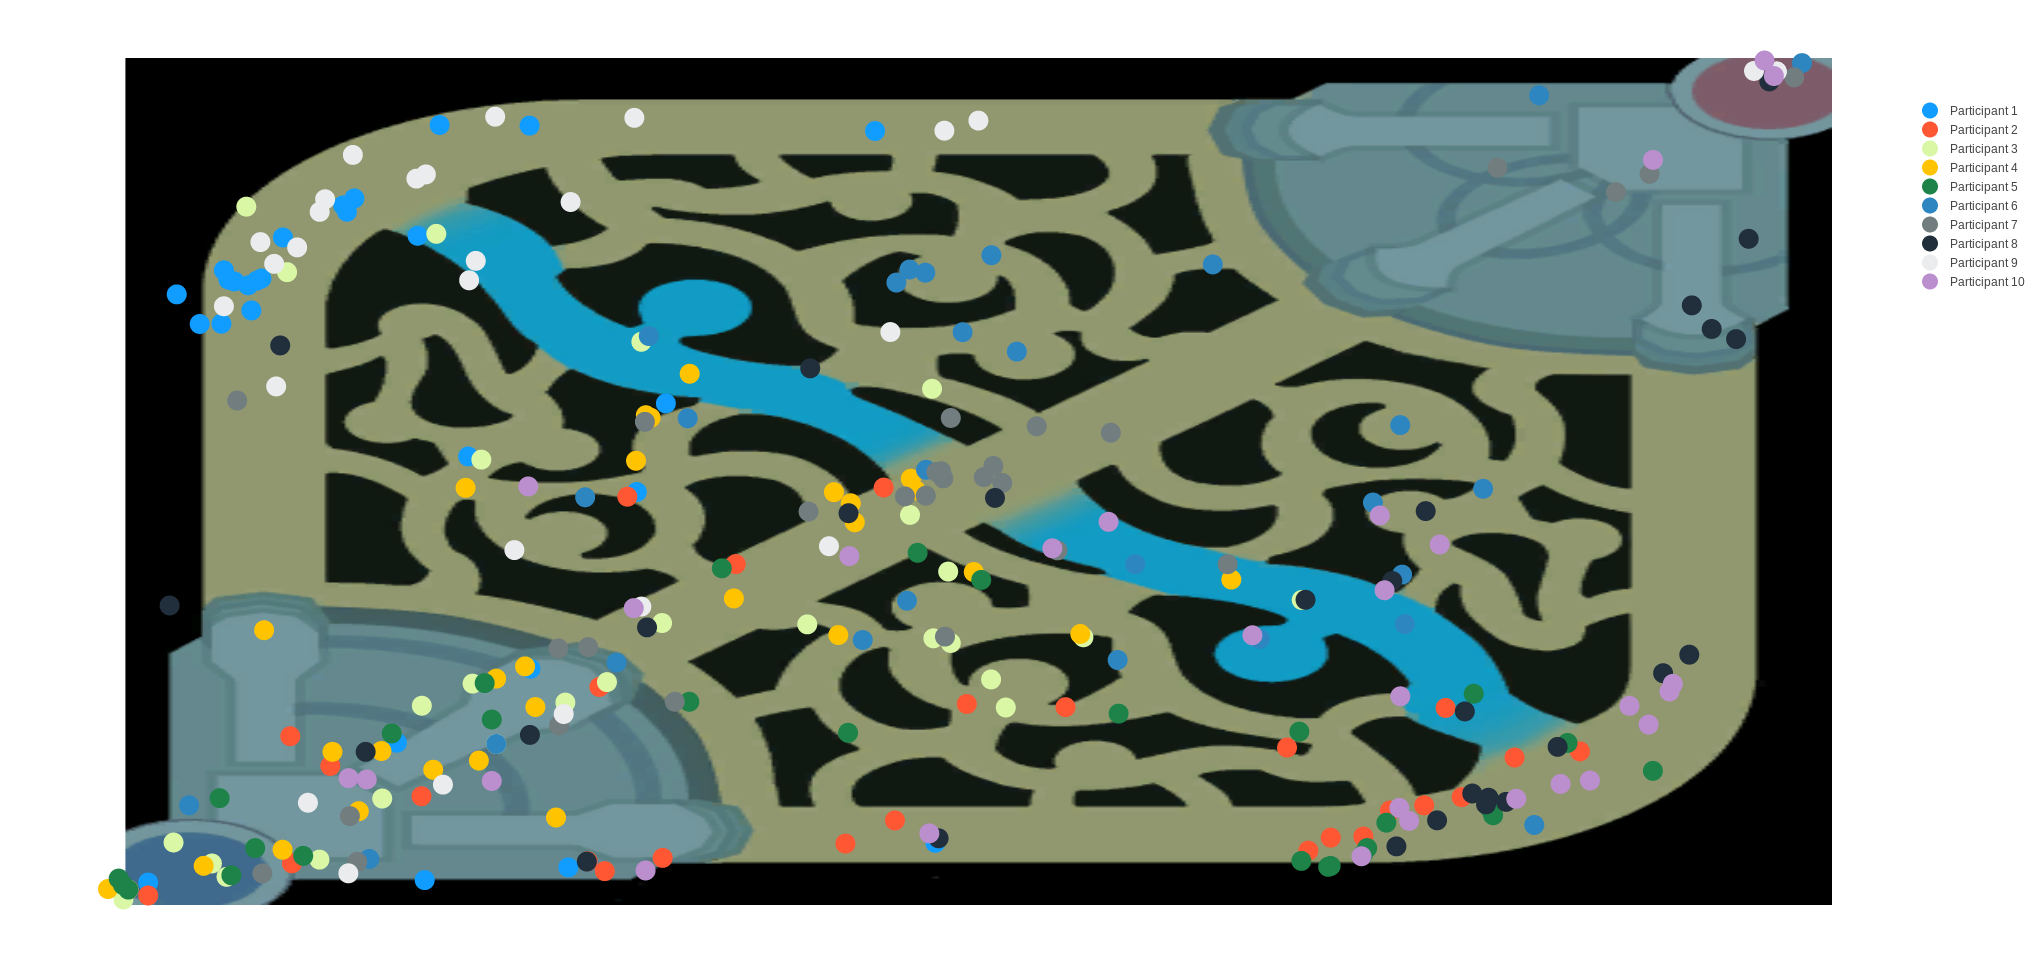

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 1]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 1]['position.y']/15, 
    mode = 'markers',
    name='Participant 1',
    marker = dict(
        color = 'rgb(17, 157, 255)',
        size = 20
    )
)

trace2 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 2]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 2]['position.y']/15,
    mode = 'markers',
    name='Participant 2',
    marker = dict(
        color = 'rgb(255, 87, 51)',
        size = 20
    )
)

trace3 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 3]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 3]['position.y']/15, 
    mode = 'markers',
    name='Participant 3',
    marker = dict(
        color = 'rgb(218, 247, 166)',
        size = 20
    )
)

trace4 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 4]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 4]['position.y']/15,
    mode = 'markers',
    name='Participant 4',
    marker = dict(
        color = 'rgb(295, 195, 0)',
        size = 20
    )
)

trace5 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 5]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 5]['position.y']/15, 
    mode = 'markers',
    name='Participant 5',
    marker = dict(
        color = 'rgb(29, 131, 72)',
        size = 20
    )
)

trace6 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 6]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 6]['position.y']/15,
    mode = 'markers',
    name='Participant 6',
    marker = dict(
        color = 'rgb(46, 134, 193)',
        size = 20
    )
)

trace7 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 7]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 7]['position.y']/15, 
    mode = 'markers',
    name='Participant 7',
    marker = dict(
        color = 'rgb(113, 125, 126)',
        size = 20
    )
)

trace8 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 8]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 8]['position.y']/15,
    mode = 'markers',
    name='Participant 8',
    marker = dict(
        color = 'rgb(33, 47, 60)',
        size = 20
    )
)

trace9 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 9]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 9]['position.y']/15, 
    mode = 'markers',
    name='Participant 9',
    marker = dict(
        color = 'rgb(234, 236, 238)',
        size = 20
    )
)

trace10 = go.Scatter(
    x = df_uc1.loc[df_uc1.participantId == 10]['position.x']/15,
    y = df_uc1.loc[df_uc1.participantId == 10]['position.y']/15,
    mode = 'markers',
    name='Participant 10',
    marker = dict(
        color = 'rgb(187, 143, 206)',
        size = 20
    )
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

img_width = 960
img_height = 960
scale_factor = 1

layout = go.Layout(
    xaxis = go.layout.XAxis(
        visible = False,
        range = [min(df_uc1['position.x']), max(df_uc1['position.x'])]),
    yaxis = go.layout.YAxis(
        visible=False,
        range = [min(df_uc1['position.y']), max(df_uc1['position.y'])]),
    legend=dict(x=1, y=.9),
    width = img_width*scale_factor,
    height = img_height*scale_factor,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    images = [go.layout.Image(
        x=0,
        sizex=img_width*scale_factor,
        y=img_height*scale_factor,
        sizey=img_height*scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source='http://ddragon.leagueoflegends.com/cdn/6.8.1/img/map/map11.png')]
)
# we add a scatter trace with data points in opposite corners to give the Autoscale feature a reference point

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig, filename='player-position')

We find : 

* The team on the top of the map won the territory occupation;
* We identify 3 principal road use by player (left road, middle road and right road);
* Some player like participant 6 play in the litle road between the 3 principal roads.

## Total of Gold

See the total of gold by player

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]  [ (1,4) x4,y1 ]  [ (1,5) x5,y1 ]
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]  [ (2,3) x3,y2 ]  [ (2,4) x4,y2 ]  [ (2,5) x5,y2 ]



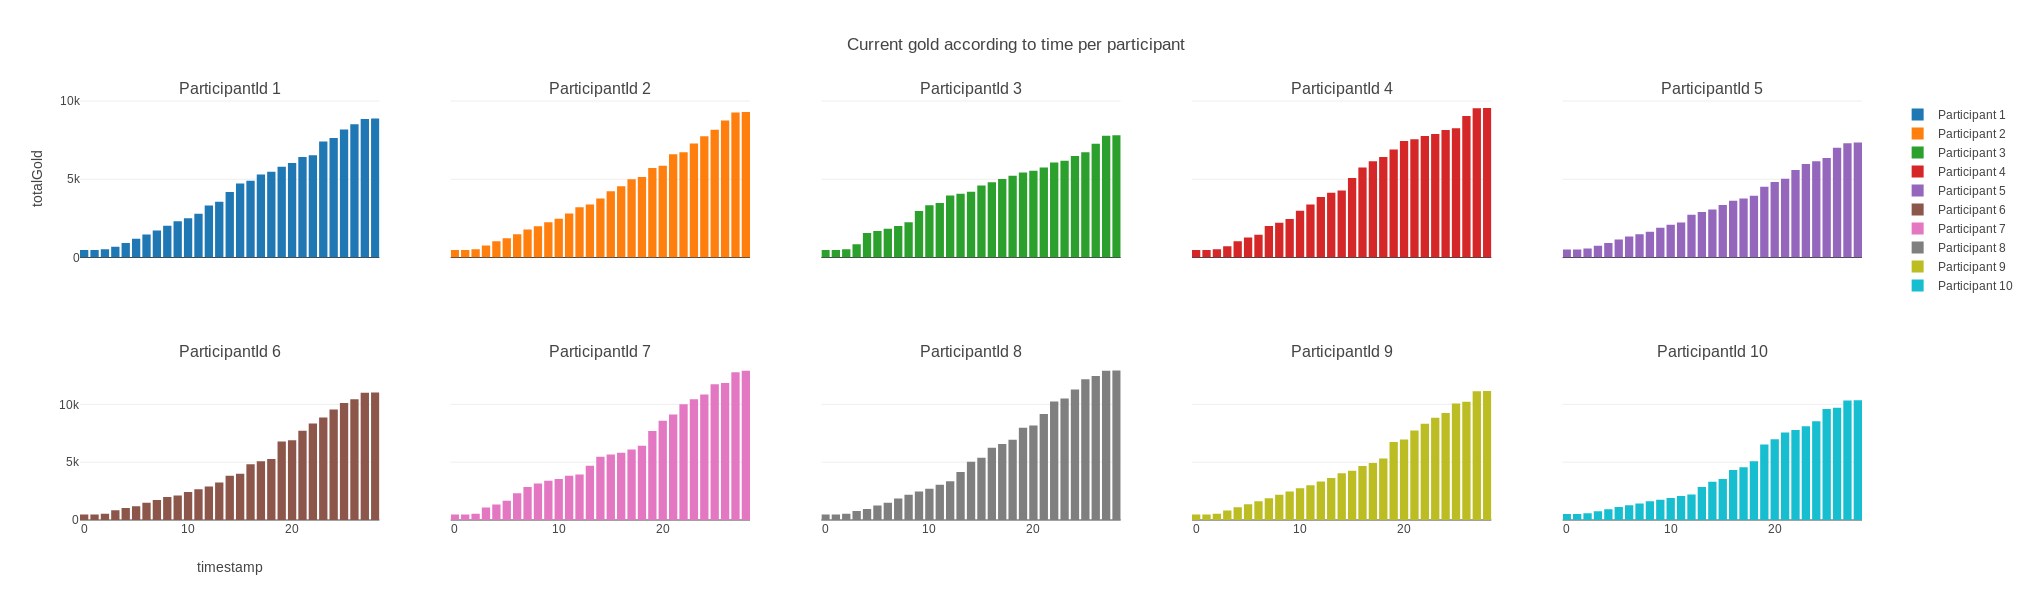

In [22]:
trace1= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 1].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 1].totalGold,
               width = 0.8,
               name='Participant 1')

trace2= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 2].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 2].totalGold,
               width = 0.8,
               name='Participant 2')

trace3= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 3].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 3].totalGold,
               width = 0.8,
               name='Participant 3')

trace4= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 4].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 4].totalGold,
               width = 0.8,
               name='Participant 4')

trace5= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 5].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 5].totalGold,
               width = 0.8,
               name='Participant 5')

trace6= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 6].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 6].totalGold,
               width = 0.8,
               name='Participant 6')

trace7= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 7].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 7].totalGold,
               width = 0.8,
               name='Participant 7')

trace8= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 8].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 8].totalGold,
               width = 0.8,
               name='Participant 8')

trace9= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 9].timestamp, 
               y=df_uc1.loc[df_uc1['participantId'] == 9].totalGold,
               width = 0.8,
               name='Participant 9')

trace10= go.Bar(x=df_uc1.loc[df_uc1['participantId'] == 10].timestamp, 
                y=df_uc1.loc[df_uc1['participantId'] == 10].totalGold,
                width = 0.8,
                name='Participant 10')

fig = tools.make_subplots(rows=2, cols=5, shared_xaxes=True, shared_yaxes=True, subplot_titles=('ParticipantId 1', 'ParticipantId 2', 'ParticipantId 3', 'ParticipantId 4', 'ParticipantId 5',
                                                                                                'ParticipantId 6', 'ParticipantId 7', 'ParticipantId 8', 'ParticipantId 9', 'ParticipantId 10'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 1, 5)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 3)
fig.append_trace(trace9, 2, 4)
fig.append_trace(trace10, 2, 5)

fig['layout'].update(height=600, width=2000, title='Current gold according to time per participant')
fig.layout.yaxis.update({'title': 'totalGold'})
fig.layout.xaxis.update({'title': 'timestamp'})
plotly.offline.iplot(fig, filename='currentGold-timestamp-participantId')

We find:
* Players 6, 7, 8, 9 and 10 finish the game with more than 10K of gold. This show us this players have made actions to earn more gold during the game;
* Players 1, 2, 3, 4 and 5 finish the game with less than 10K of gold.

## XP

See the xp of players by timestamp

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]  [ (1,3) x3,y1 ]  [ (1,4) x4,y1 ]  [ (1,5) x5,y1 ]
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]  [ (2,3) x3,y2 ]  [ (2,4) x4,y2 ]  [ (2,5) x5,y2 ]



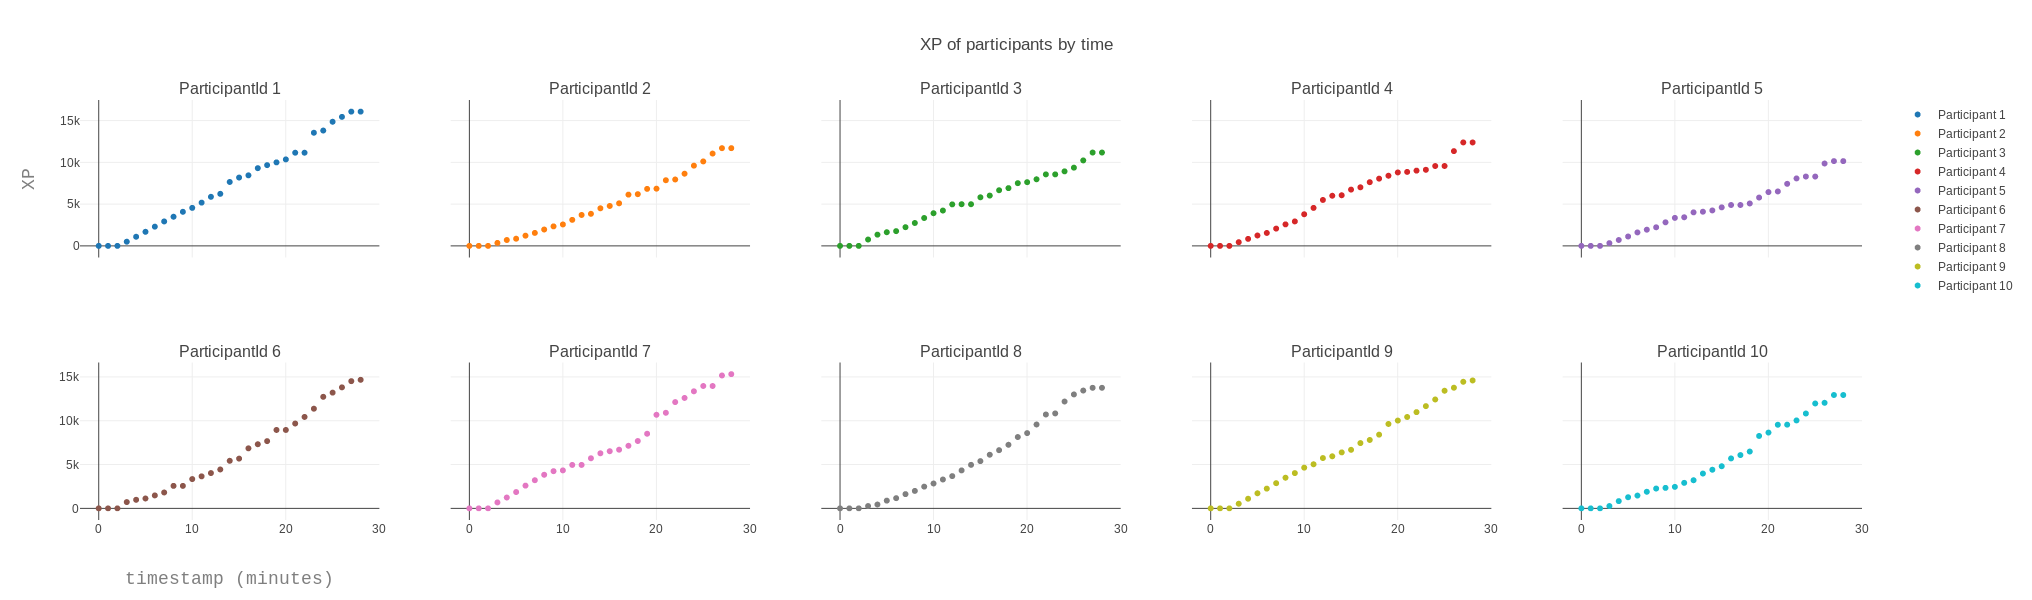

In [23]:
trace1= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 1].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 1].xp,
                   name='Participant 1',
                   mode = 'markers')

trace2= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 2].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 2].xp,
                   name='Participant 2',
                   mode = 'markers')

trace3= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 3].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 3].xp,
                   name='Participant 3',
                   mode = 'markers')

trace4= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 4].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 4].xp,
                   name='Participant 4',
                   mode = 'markers')

trace5= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 5].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 5].xp,
                   name='Participant 5',
                   mode = 'markers')

trace6= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 6].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 6].xp,
                   name='Participant 6',
                   mode = 'markers')

trace7= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 7].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 7].xp,
                   name='Participant 7',
                   mode = 'markers')

trace8= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 8].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 8].xp,
                   name='Participant 8',
                   mode = 'markers')

trace9= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 9].timestamp, 
                   y=df_uc1.loc[df_uc1['participantId'] == 9].xp,
                   name='Participant 9',
                   mode = 'markers')

trace10= go.Scatter(x=df_uc1.loc[df_uc1['participantId'] == 10].timestamp, 
                    y=df_uc1.loc[df_uc1['participantId'] == 10].xp,
                    name='Participant 10',
                    mode = 'markers')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

fig = tools.make_subplots(rows=2, cols=5, shared_xaxes=True, shared_yaxes=True, subplot_titles=('ParticipantId 1', 'ParticipantId 2', 'ParticipantId 3', 'ParticipantId 4', 'ParticipantId 5',
                                                                                                'ParticipantId 6', 'ParticipantId 7', 'ParticipantId 8', 'ParticipantId 9', 'ParticipantId 10'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 1, 5)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 3)
fig.append_trace(trace9, 2, 4)
fig.append_trace(trace10, 2, 5)

fig['layout'].update(height=600, width=2000, title='XP of participants by time', 
                     xaxis = dict(
                         title='timestamp (minutes)',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='XP',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='currentGold-timestamp-participantId')

We find: 
* Team player 6 -> 10, all player is around 15k of xp at the end of the game. This show us that team 2 players, have realised actions who earned more experience thant team 1 players;
* in the other team, only player 1 have more than 15k of xp. Others have just more than 10k of xp.

## Assisting participantIds

See assists relation between participant

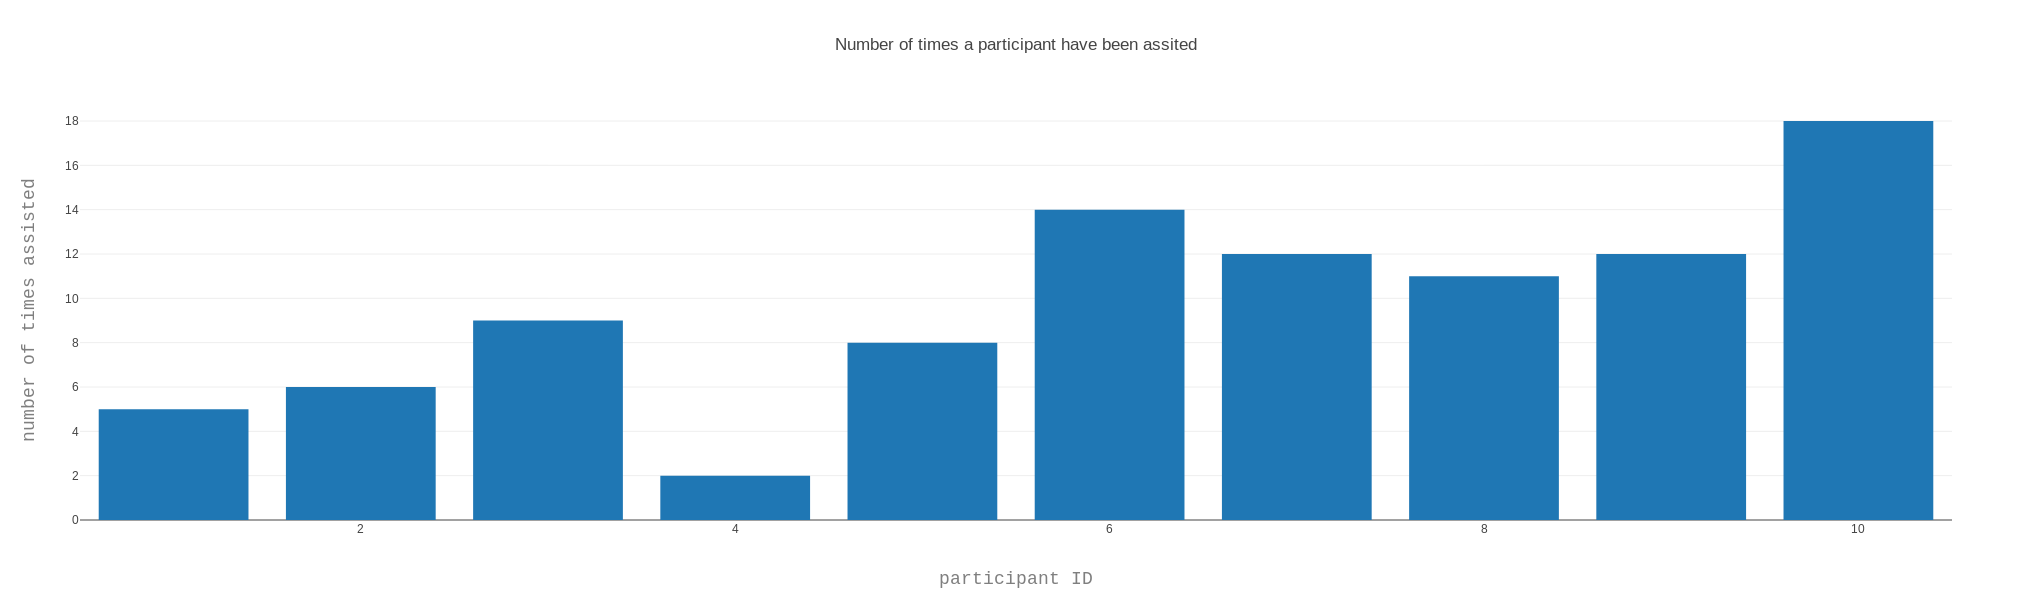

In [24]:
assist = df_uc1[df_uc1.assistingParticipantIds.notnull()].assistingParticipantIds # Select assistinParticipantIds not null only

# Merge all list in one
mergelist = []

for l in assist: 
    mergelist += l 

# Create a dict of values counts
assist_value_count = dict((x,mergelist.count(x)) for x in set(mergelist))

# Create to list, one for keys and an other for dict
keys = []
values = []

for key, value in assist_value_count.items():
    keys.append(key)
    values.append(value)

# Create the visualisation
trace= go.Bar(x=keys, 
              y=values)

data=[trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Number of times a participant have been assited', 
                     xaxis = dict(
                         title='participant ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='number of times assisted',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='assists-count-participantId')

We find: 
* Team player 1 -> 5, we can observe there are not many assists realised;
* Team player 6 -> 10, there were a lot's of assists realised between player. This tell us that this team killed ennemies in cooperation.

## Building type

See the number of building type

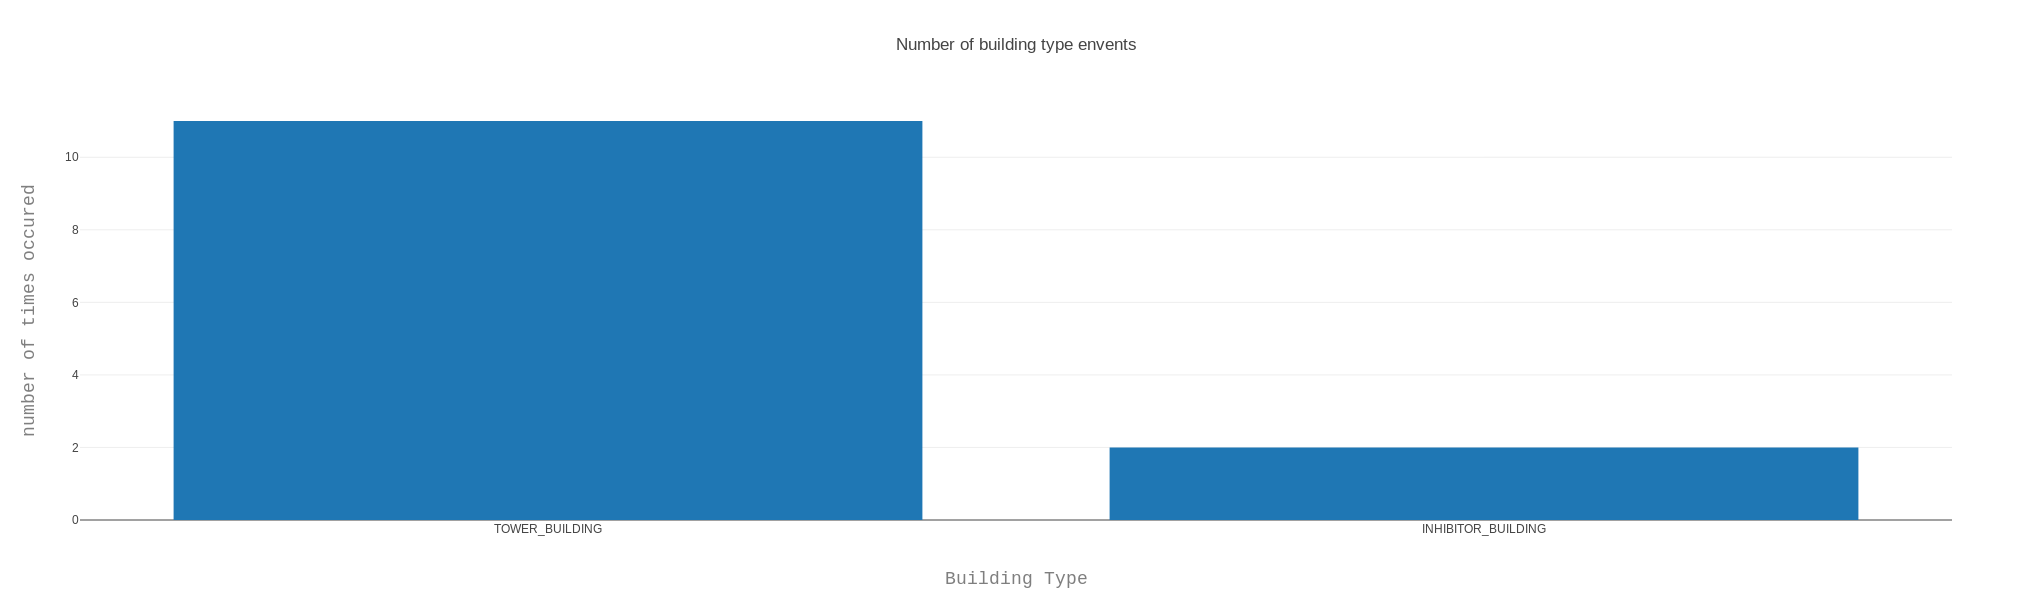

In [63]:
buildingType = df_uc1[df_uc1.buildingType.notnull()].buildingType # Select buildingType not null only
temp = buildingType.value_counts()

index = ["TOWER_BUILDING", "INHIBITOR_BUILDING"]
value_count = [temp.loc["TOWER_BUILDING"], temp.loc["INHIBITOR_BUILDING"]]

# Create the visualisation
trace= go.Bar(x=index, 
              y=value_count)

data=[trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Number of building type envents', 
                     xaxis = dict(
                         title='Building Type',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='number of times occured',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='assists-count-participantId')

We find: 
* There are much events with "TOWER_BUILDING"
* These data representation is normal. Because in the map each team have 11 "TOWER_BUILDING" and 3 "INHIBITOR_BUILDING". 

## Creator ID

See the number of ward created by participant

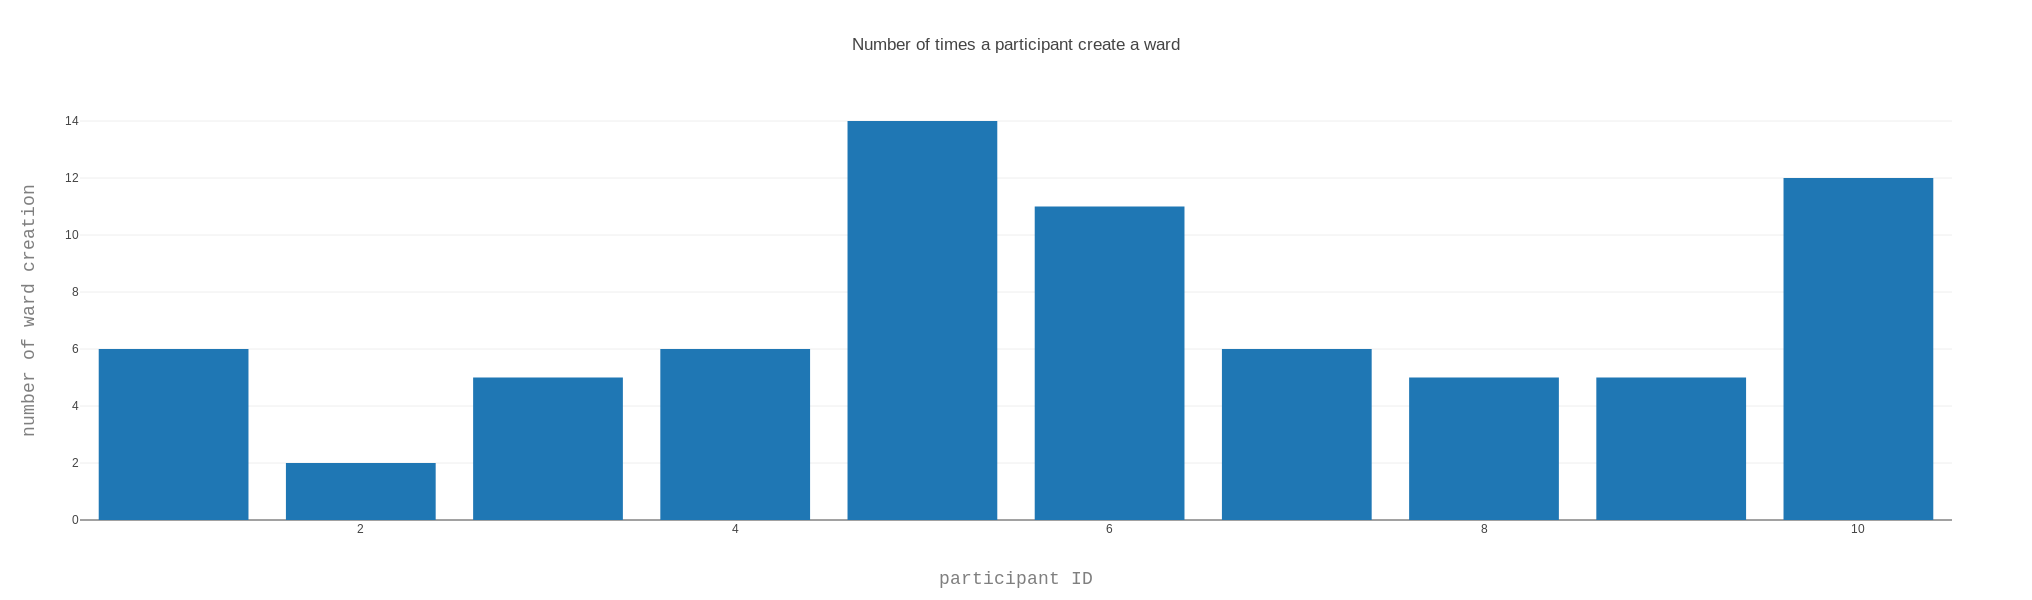

In [71]:
creatorId = df_uc1[df_uc1.creatorId.notnull()].creatorId # Select creatorID not null only

temps = creatorId.value_counts()

index = temps.index
index = list(map(int, index))

value = temps.values
value = value.tolist()

# Create the visualisation
trace= go.Bar(x=index, 
              y=value)

data=[trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Number of times a participant create a ward', 
                     xaxis = dict(
                         title='participant ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='number of ward creation',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='creator-count-participantId')

We find: 
* Participant 5, 6 and 10 use a lot of ward during te game;
* Other players don't use this items during a game;
* This show us the stragety adopt by players.

## Item ID

See the number of itemID occuration

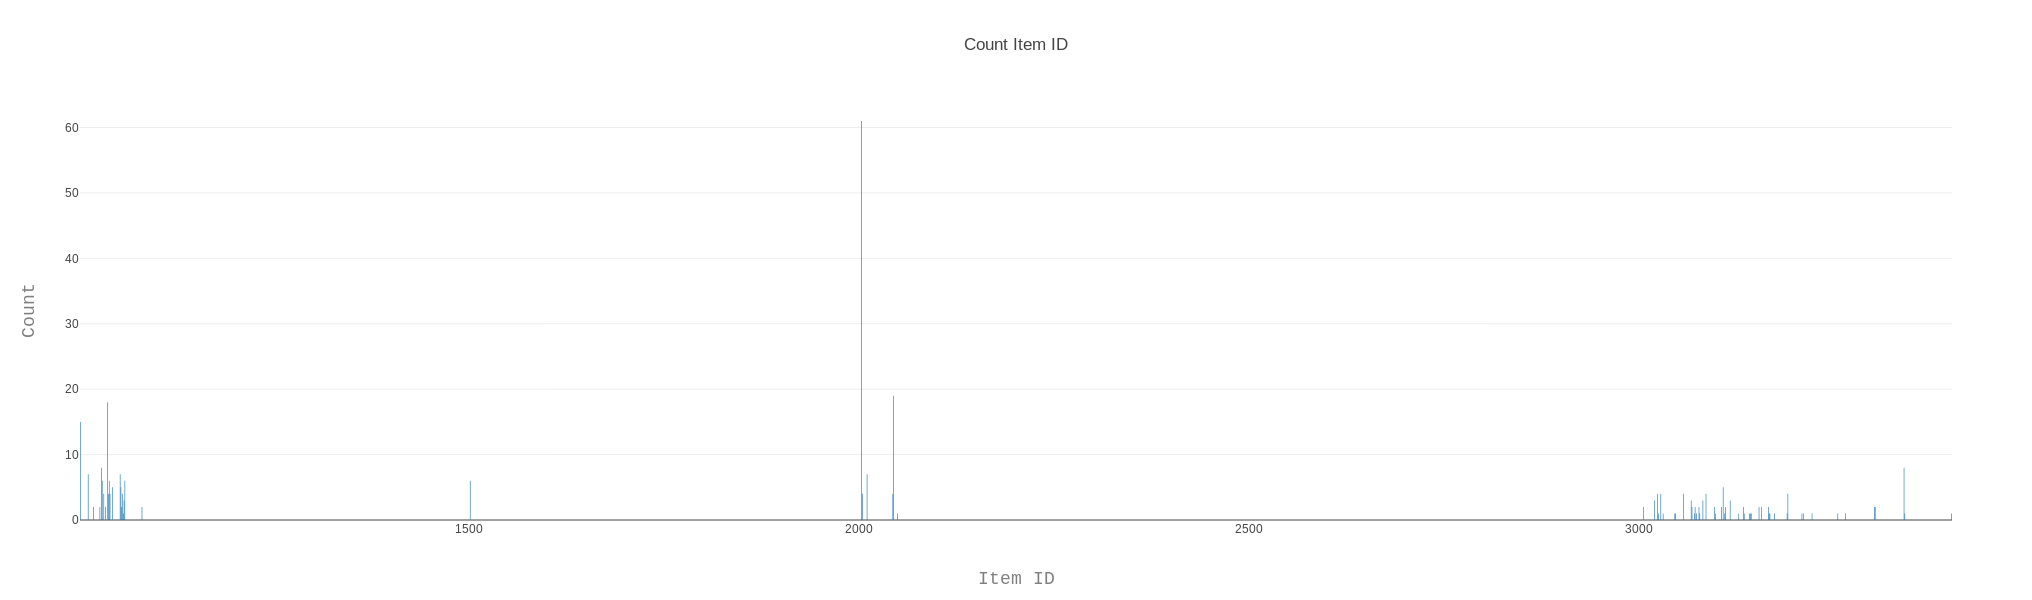

In [27]:
itemId = df_uc1[df_uc1.itemId.notnull()].itemId # Select itemId not null only

temps = itemId.value_counts()

index = temps.index
index = list(map(int, index))

value = temps.values
value = value.tolist()

# Create the visualisation
trace= go.Bar(x=index, 
              y=value)

data=[trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Count Item ID', 
                     xaxis = dict(
                         title='Item ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='Count',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='count-itemId')

We find : 
* Item ID '2003' is the most used by players during the game;
* We can think that the '2003' item is a potion because all players use this items many times. 

## Killer ID

See the number of kill by participant

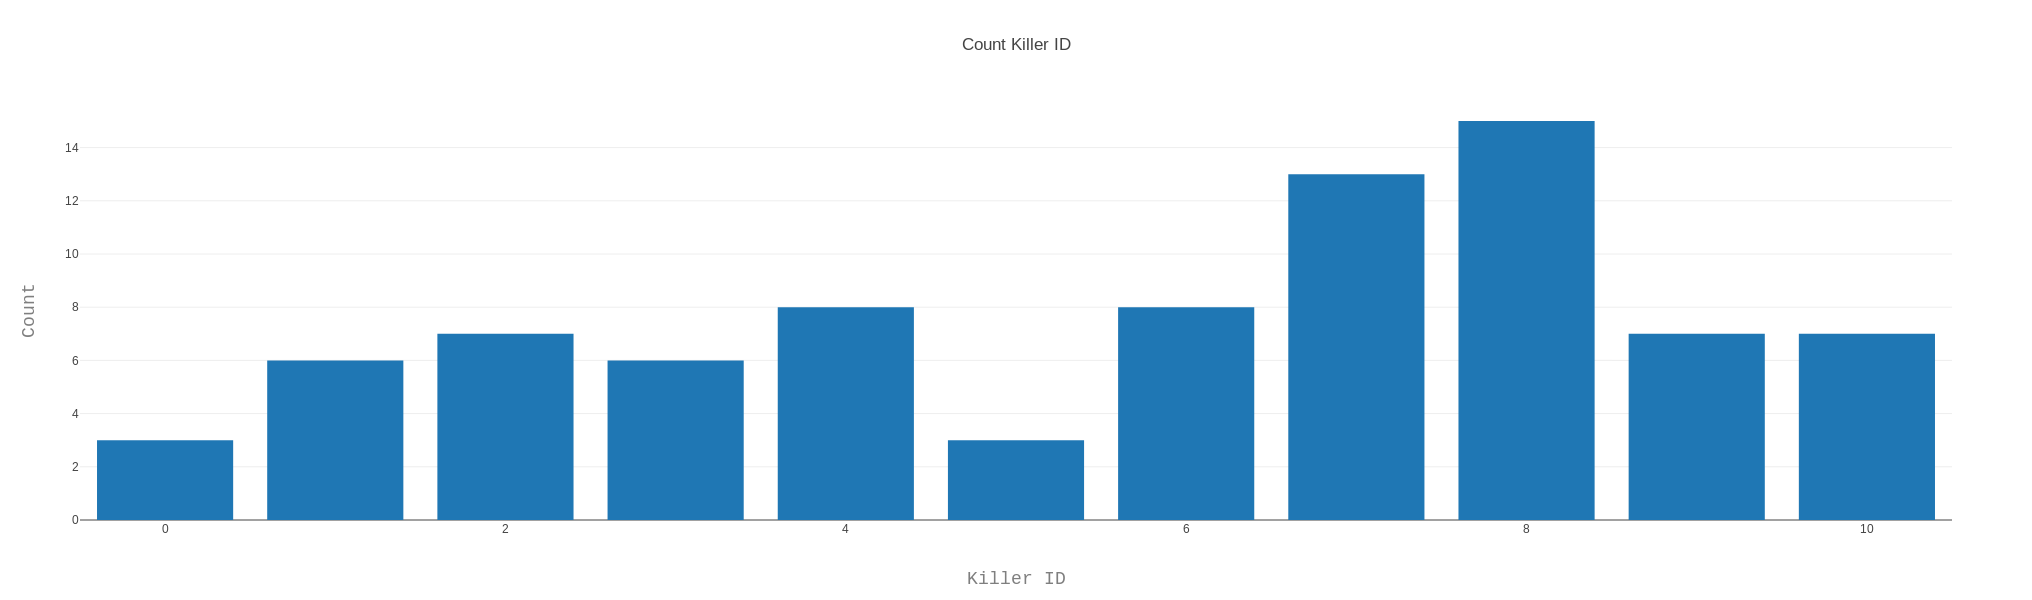

In [28]:
killerId = df_uc1[df_uc1.killerId.notnull()].killerId # Select killerId not null only

temp = killerId.value_counts()

index = temp.index
index = list(map(int, index))

value = temp.values
value = value.tolist()

# Create the visualisation
trace= go.Bar(x=index, 
              y=value)

data=[trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Count Killer ID', 
                     xaxis = dict(
                         title='Killer ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='Count',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='count-killerId')

We find: 
* Player 8 (15) and 7(13) have killed (building or champion)the most in the game;
* This two players are in the same team so we can think that team 2 as won.

## Lane Type

See all the lane types

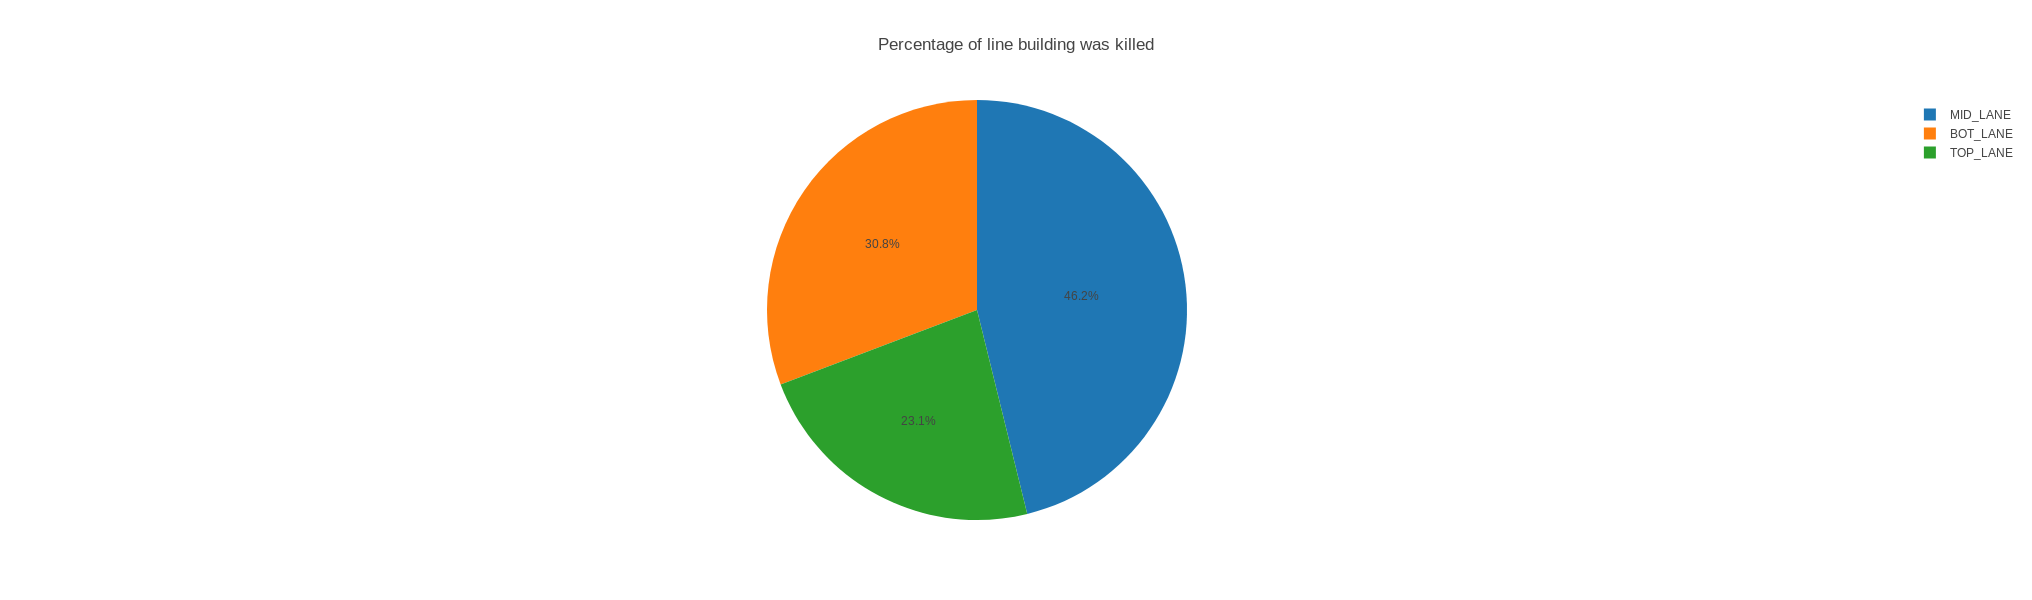

In [59]:
laneType = df_uc1[df_uc1.laneType.notnull()].laneType # Select laneType not null only

temps = laneType.value_counts()

labels = temps.index
labels = list(map(str, labels))

values = temps.values
values.tolist()

# Create the visualisation
trace= go.Pie(labels=labels, 
              values=values)

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Percentage of line building was killed')

plotly.offline.iplot(fig, filename='Lane-type')

We find: 
* Building kill have been made principaly in the 'MID_LANE';
* This tell us that players principaly try to take the 'MID_LANE' to win the game.

## Monster Type

See percentage of monster type

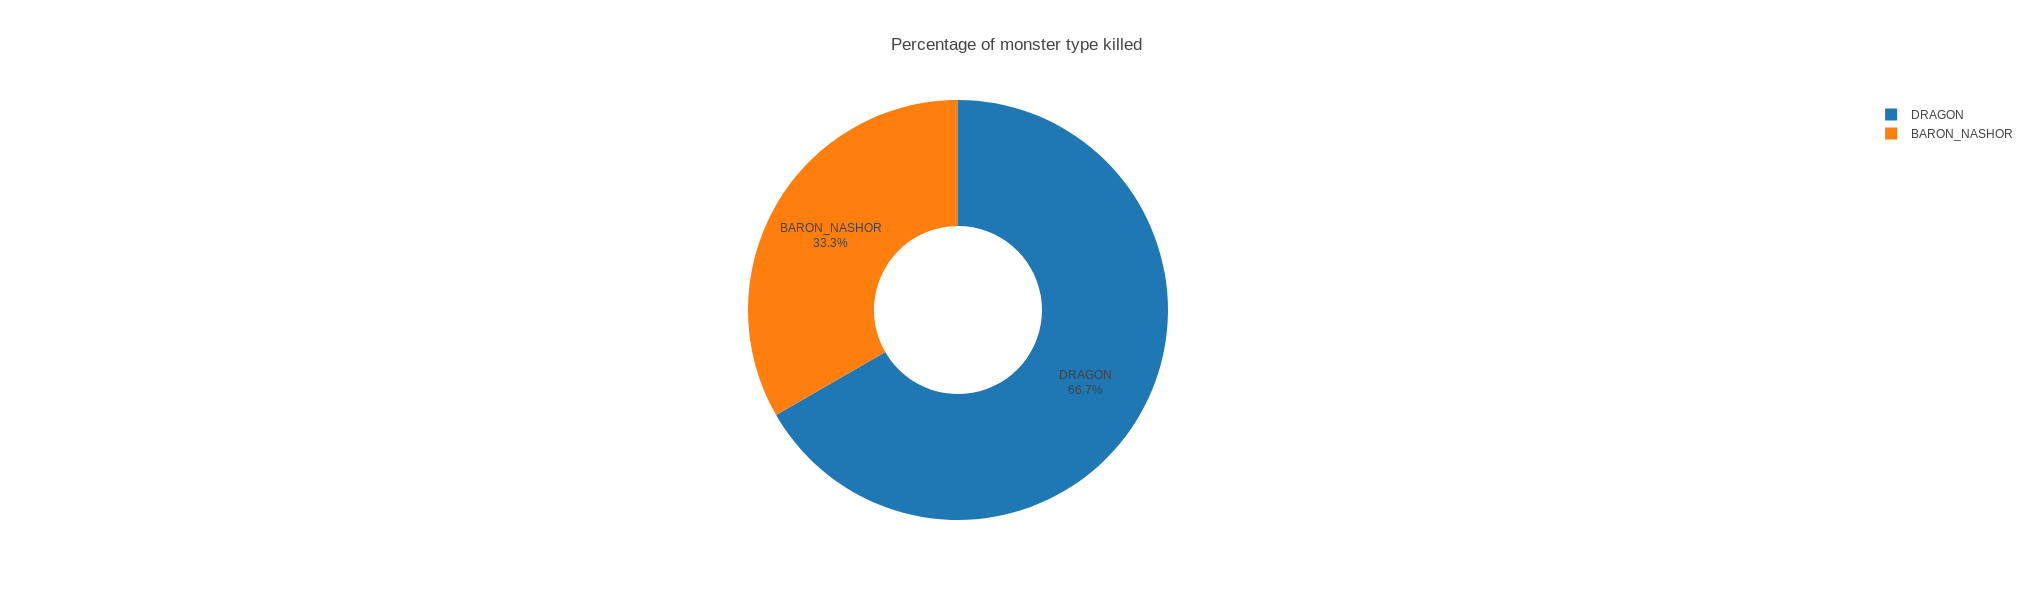

In [56]:
monsterType = df_uc1[df_uc1.monsterType.notnull()].monsterType # Select monsterType not null only

temps = monsterType.value_counts()

labels = temps.index
labels = list(map(str, labels))

values = temps.values
values.tolist()

# Create the visualisation
trace= go.Pie(labels=labels, 
              values=values,
              hole=.4,
              textinfo='label+percent')

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Percentage of monster type killed')

plotly.offline.iplot(fig, filename='Monster-type')

We find:
* 2/3 'ELITE_MONSTER' killed was dragons;
* 1/3 'ELITE_MONSTER' killed was a Baron_nashor;
* 3 elite monster killed is not much. We can think that drangon give more ressources to a player.

## Position

See the position of each events. we can see that we migth have only events for one team because all positions seems to be located on the left side of the map.

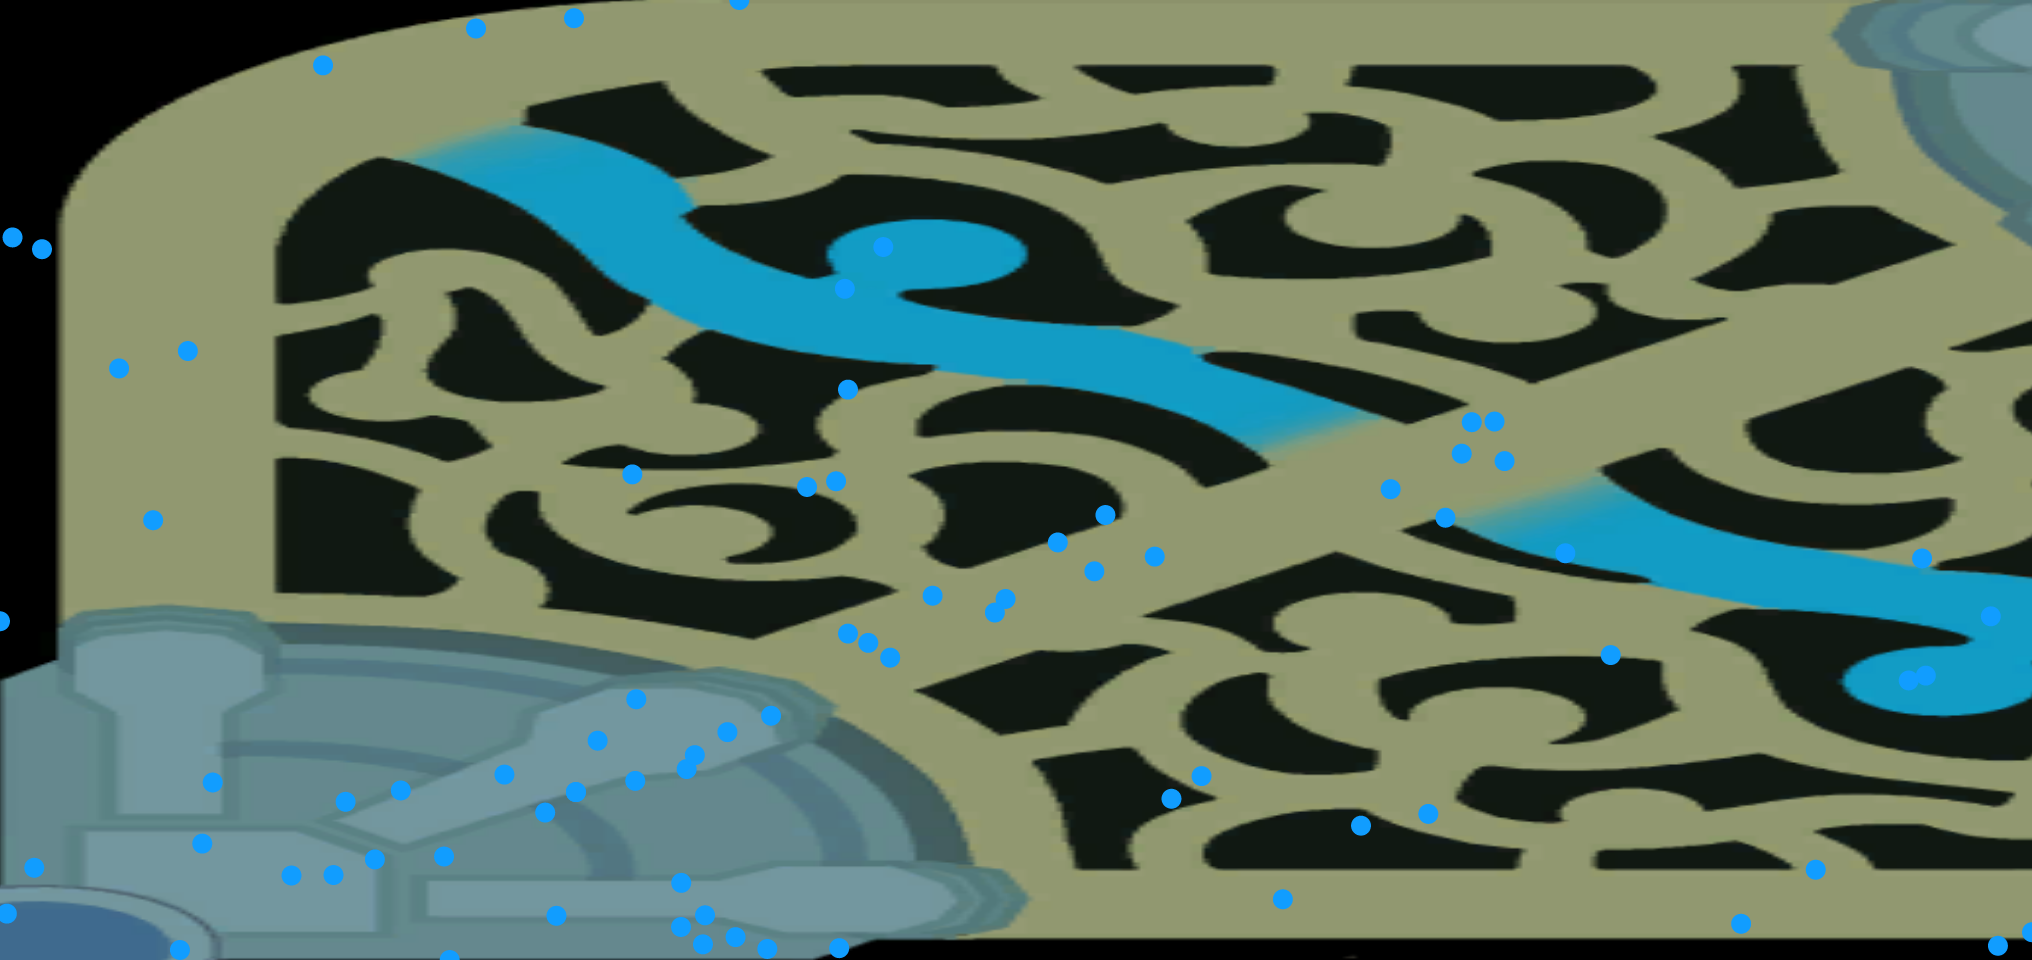

In [31]:
position = df_uc1[df_uc1.position.notnull()].position

pos_list = []
for i in range(0, len(position)):
    pos_list.append(list(position.values[i].values()))

pos_x = []
pos_y = []

for x, y in pos_list:
    pos_x.append(x/15)
    pos_y.append(y/15)

trace = go.Scatter(
    x = pos_x,
    y = pos_y, 
    mode = 'markers',
    name='Events',
    marker = dict(
        color = 'rgb(17, 157, 255)',
        size = 20
    )
)

data = [trace]

img_width = 960
img_height = 960
scale_factor = 1

layout = go.Layout(
    xaxis = go.layout.XAxis(
        visible = False,
        range = [min(pos_x), max(pos_x)]),
    yaxis = go.layout.YAxis(
        visible=False,
        range = [min(pos_y), max(pos_y)]),
    legend=dict(x=1, y=.9),
    width = img_width*scale_factor,
    height = img_height*scale_factor,
    margin = {'l': 0, 'r': 0, 't': 0, 'b': 0},
    images = [go.layout.Image(x=0,
                              sizex=img_width*scale_factor,
                              y=img_height*scale_factor,
                              sizey=img_height*scale_factor,
                              xref="x",
                              yref="y",
                              opacity=1.0,
                              layer="below",
                              sizing="stretch",
                              source='http://ddragon.leagueoflegends.com/cdn/6.8.1/img/map/map11.png')]
)
# we add a scatter trace with data points in opposite corners to give the Autoscale feature a reference point

fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig, filename='player-position')

We find : 
* Each events position is in the left side of the map;
* Option 1, we don't have all events data;
* Option 2, right team have dominated the game. 

## Team ID

See the team ID. The result confirm that the majority of events is for team 100.

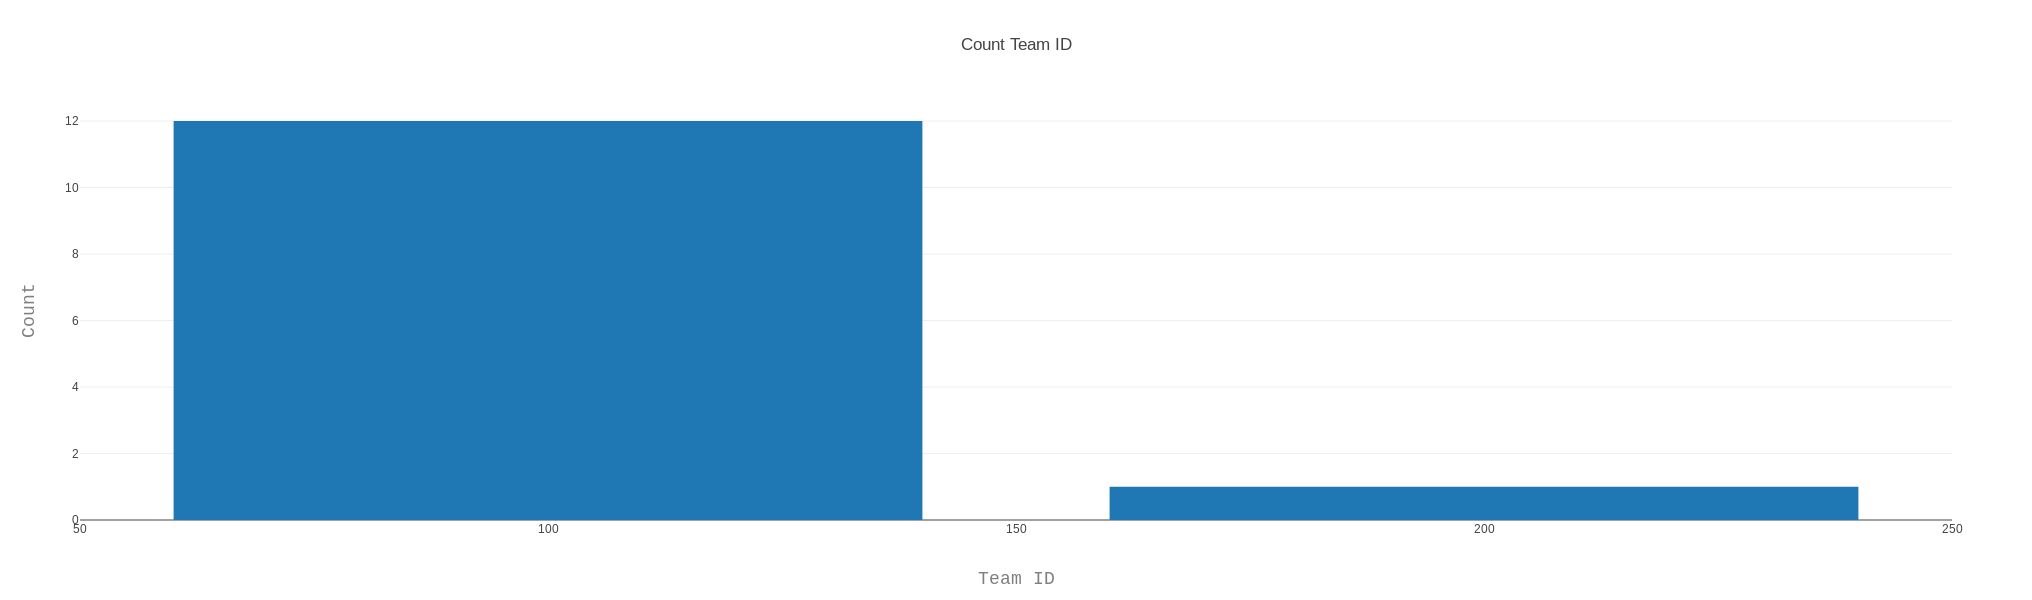

In [32]:
teamId = df_uc1[df_uc1.teamId.notnull()].teamId # Select teamId not null only

temps = teamId.value_counts()

labels = temps.index
labels = list(map(str, labels))

values = temps.values
values.tolist()

trace = go.Bar(x=labels,
               y=values)

data=[trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Count Team ID', 
                     xaxis = dict(
                         title='Team ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='Count',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='count-killerId')

We find: 
* Most of building kill events concern team 100;
* Only one event concern team 200;
* We can think team 100 is composed of player 6 -> 10.

## Tower Type 

See the number of tower events by tower type

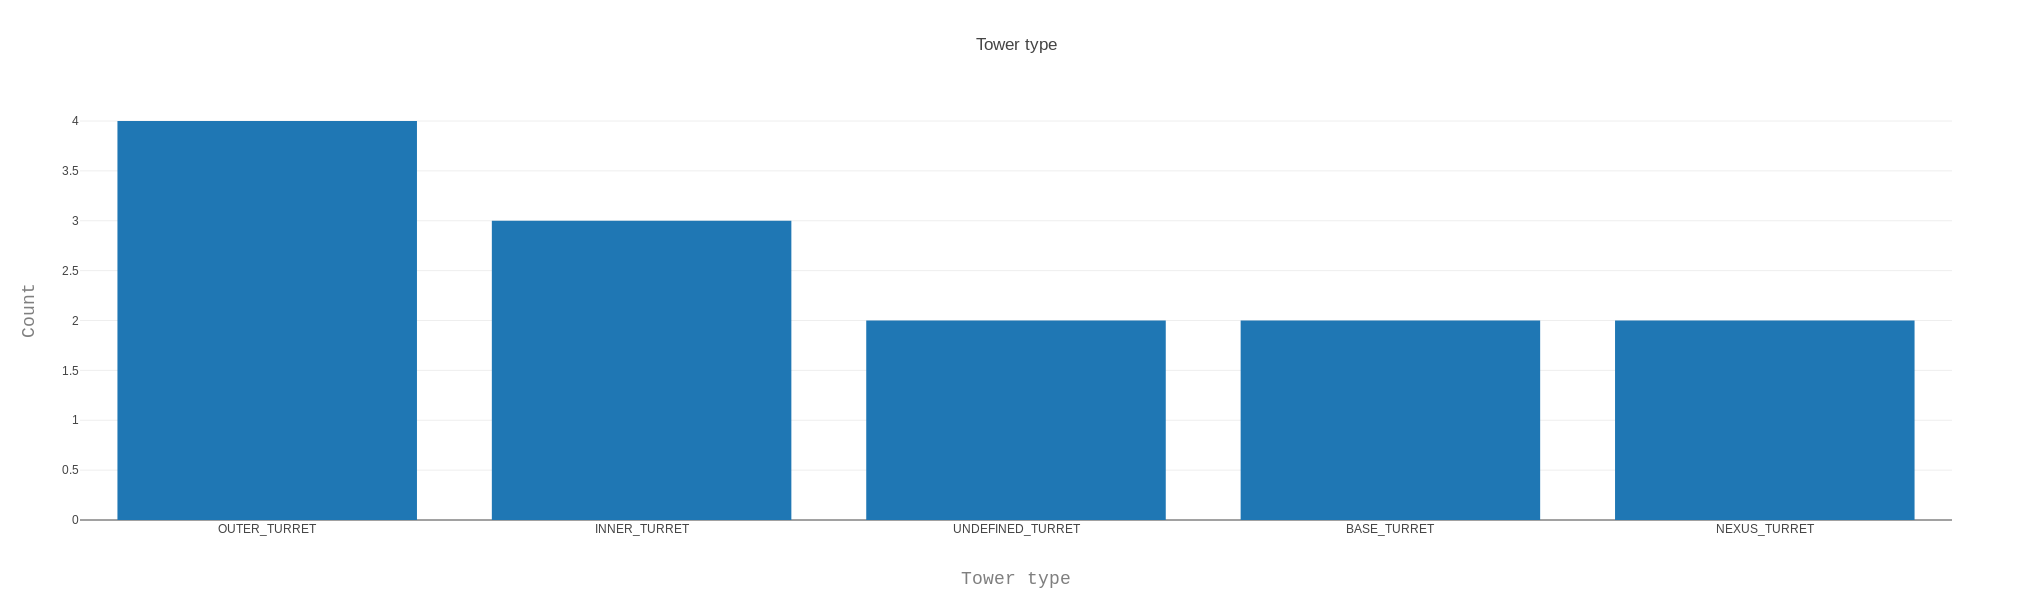

In [33]:
towerType = df_uc1[df_uc1.towerType.notnull()].towerType # Select towerType not null only

temps = towerType.value_counts()

labels = temps.index
labels = list(map(str, labels))

values = temps.values

trace = go.Bar(x=labels,
               y=values)

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Tower type', 
                     xaxis = dict(
                         title='Tower type',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                     ),
                     yaxis = dict(
                         title='Count',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='count-towerType')

We find: 
* 'OUTER_TURRET', was the most killed Tower;
* The total count excluding 'UNDEFINED-TURRET', is 11;
* The type 'UNDEFINED_TURRET' appears two times. There are two tower of this types;
* We can say the 'UNDEFINDED_TURRET' correspond to 'INHIBITOR_BUILDING'

## Type

See the number of events types

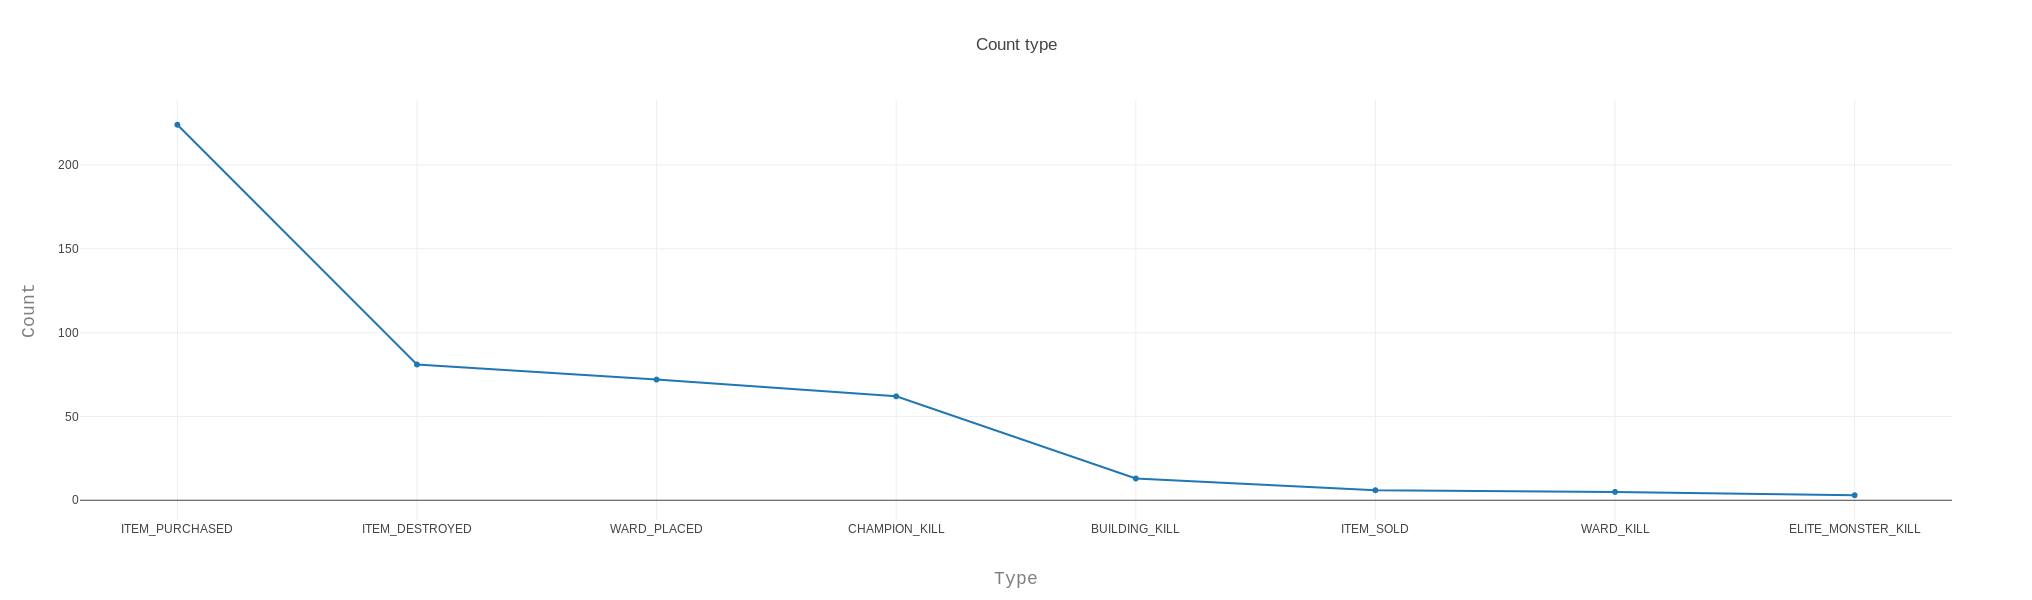

In [80]:
event_type = df_uc1[df_uc1.type.notnull()].type # Select type not null only

temps = event_type.value_counts()

labels = temps.index
labels = list(map(str, labels))

values = temps.values

trace = go.Scatter(x=labels,
                  y=values)

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Count type', 
                     xaxis = dict(
                         title='Type',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     yaxis = dict(
                         title='Count',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='count-type')

## Victim ID

See the number of time a participant was killed

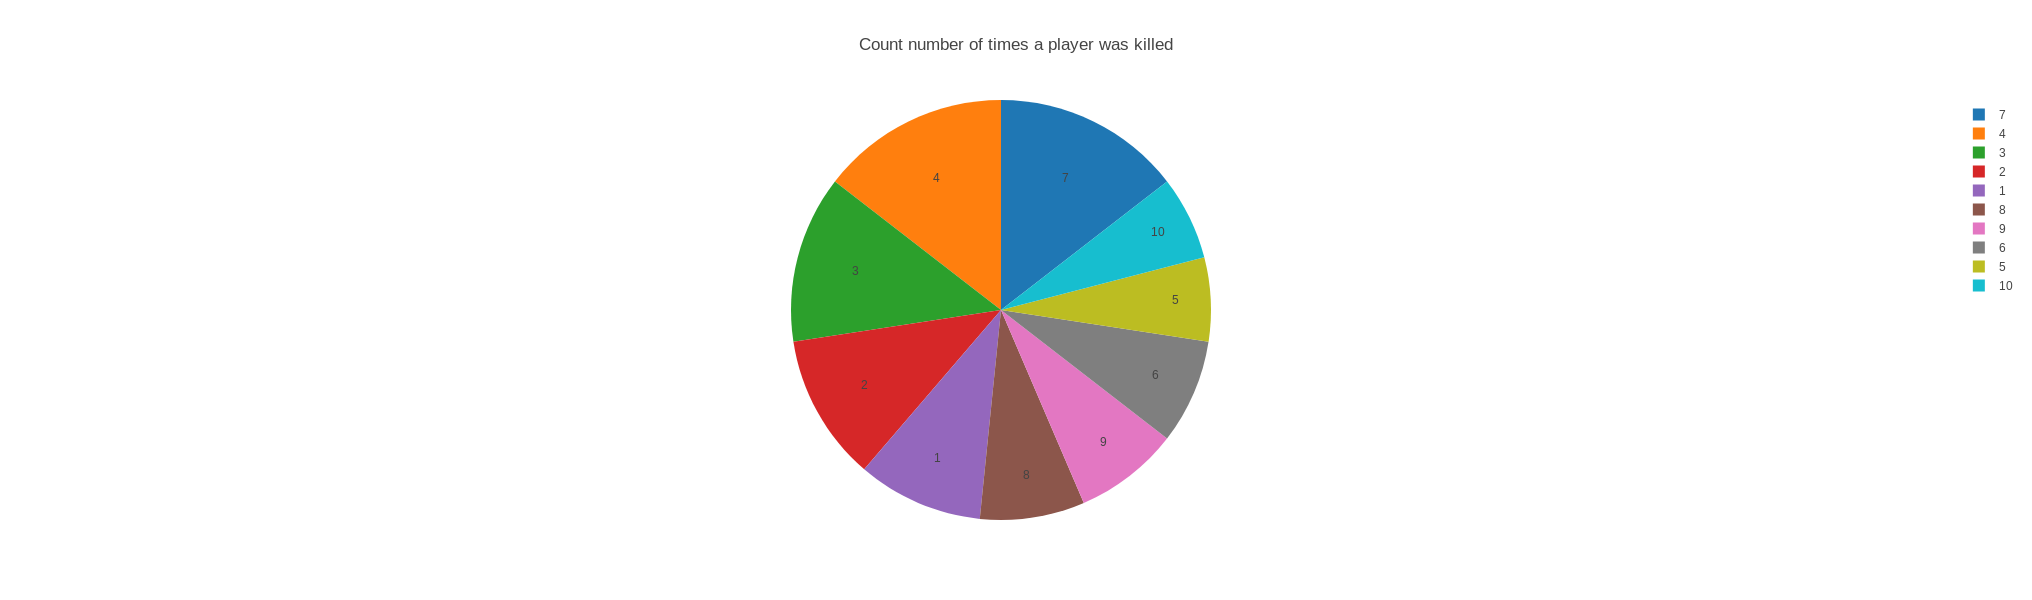

In [55]:
victimId = df_uc1[df_uc1.victimId.notnull()].victimId # Select victimId not null only

temps = victimId.value_counts()

labels = temps.index
labels = list(map(int, labels))

values = temps.values
values.tolist()

# Create the visualisation
trace= go.Pie(labels=labels, 
              values=values,
              textinfo='label')

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Count number of times a player was killed')

plotly.offline.iplot(fig, filename='Lane-type')

## Ward Type 

See the different ward type

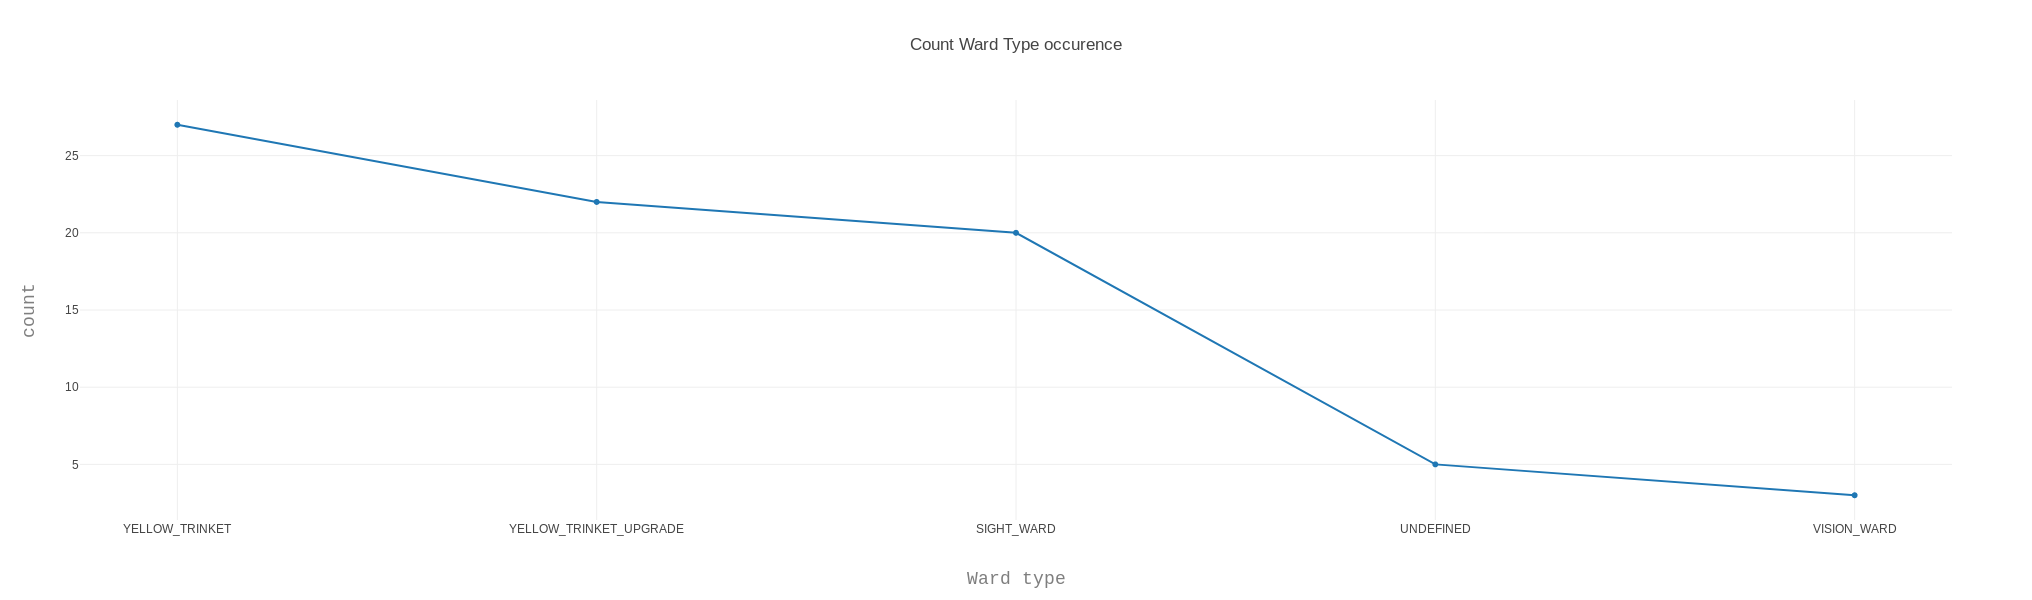

In [53]:
wardType = df_uc1[df_uc1.wardType.notnull()].wardType # Select wardType not null only

temps = wardType.value_counts()

labels = temps.index
labels = list(map(str, labels))

values = temps.values
values.tolist()

# Create the visualisation
trace= go.Scatter(x=labels, 
                  y=values)

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Count Ward Type occurence', 
                     xaxis = dict(
                         title='Ward type',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     yaxis = dict(
                         title='count',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='ward-type')

## Max Jungle Minions Killed

See the max jungle minions killed

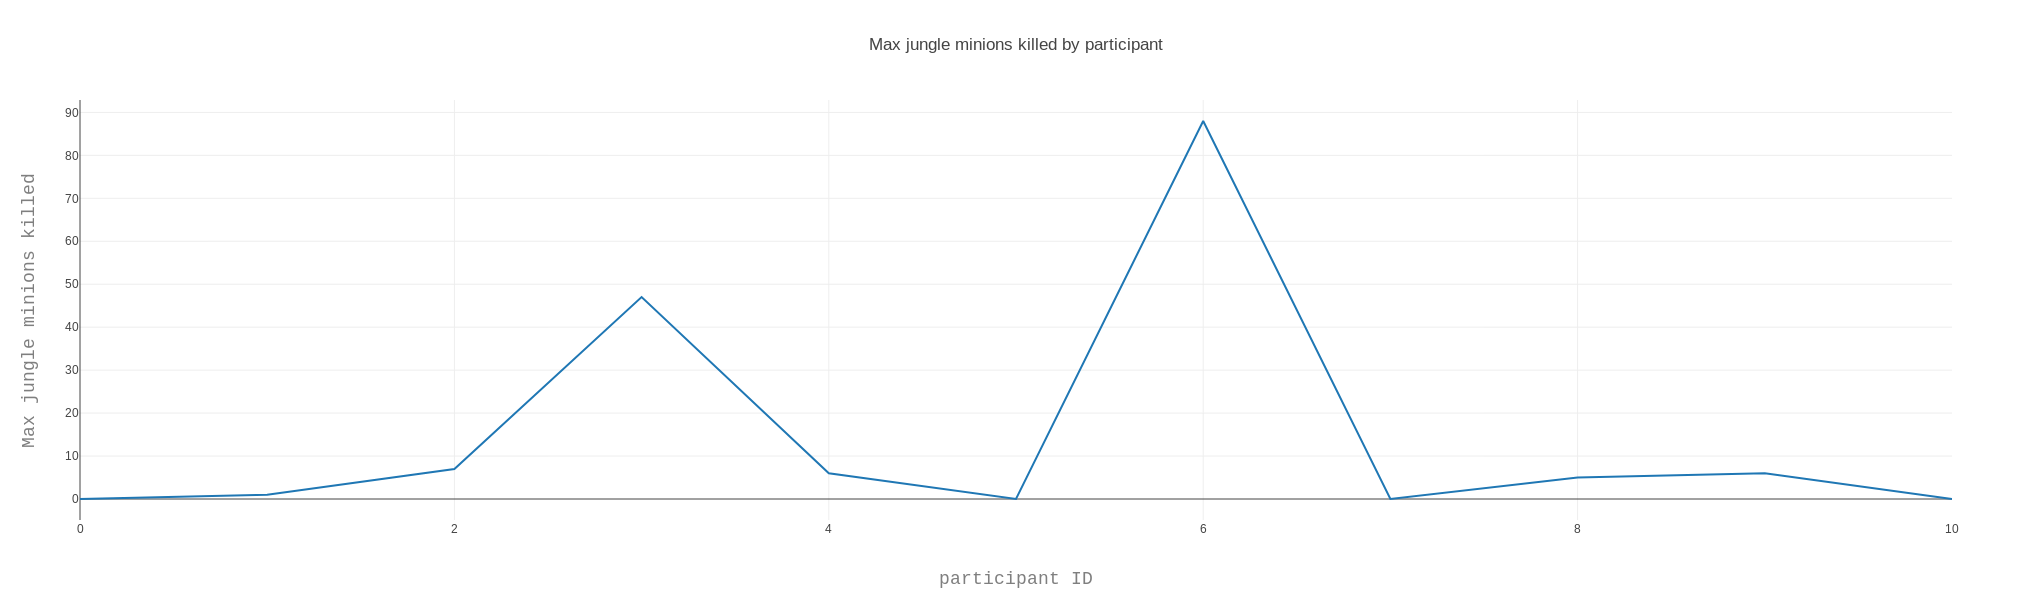

In [52]:
maxJungleMinionsKilled = df_uc1[df_uc1.max_jungleMinionsKilled.notnull()] # Select maxJungleMinionsKilled not null only

labels = maxJungleMinionsKilled.participantId
labels = list(map(str, labels))

values = maxJungleMinionsKilled.max_jungleMinionsKilled
values.tolist()

# Create the visualisation
trace= go.Scatter(x=labels, 
                  y=values)

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Max jungle minions killed by participant', 
                     xaxis = dict(
                         title='participant ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     yaxis = dict(
                         title='Max jungle minions killed',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='max_jungleMinionsKilled')

## Max Minions Killed

See the max minions killed

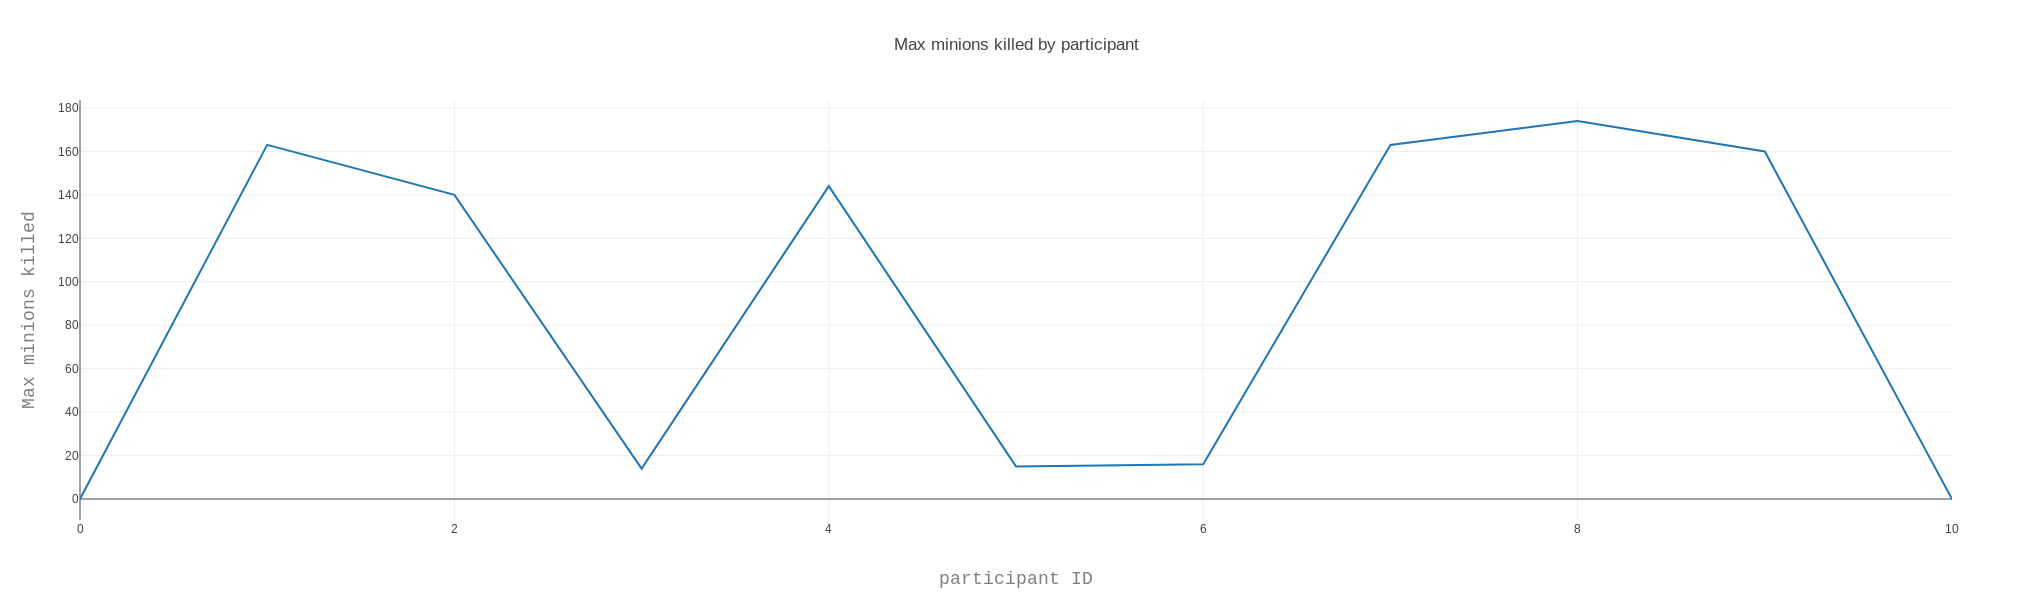

In [62]:
maxMinionsKilled = df_uc1[df_uc1.max_minionsKilled.notnull()] # Select maxMinionsKilled not null only

labels = maxMinionsKilled.participantId
labels = list(map(str, labels))

values = maxMinionsKilled.max_minionsKilled
values.tolist()

# Create the visualisation
trace= go.Scatter(x=labels, 
                  y=values)

data = [trace]

fig = go.Figure(data=data)

fig['layout'].update(height=600, width=2000, title='Max minions killed by participant', 
                     xaxis = dict(
                         title='participant ID',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     yaxis = dict(
                         title='Max minions killed',
                         titlefont = dict(
                             family='Courier New, monospace',
                             size=18,
                             color='#7f7f7f')
                         ),
                     )

plotly.offline.iplot(fig, filename='max_minionsKilled')

# Feature relations

After looking at every data set individually, let's start combining them. This will tell us something abou the relations between the various features and how these relations might affect the number of gold of players. Any signal we find will need to be interpreted in the context of the individual feature distributions; wich is why it was one of our first steps to study those.

In [40]:
#test = pd.Series()
#for list in df_copy[df_copy['participantId'] == 1].assistingParticipantIds:
#    test1 = pd.Series()
#    if len(list) != 0:
#        test1.append(test1)
#    test.append(test1)
#test

In [41]:
print(toto)

NameError: name 'toto' is not defined

In [ ]:
#trace = go.Scatter(
#    x=df_uc1.participantId,y=df_uc1.participantId,
###    marker=dict(size=[30, 80, 200]),
#    mode='markers')

#data=[trace]

#fig = go.Figure(data=data)

#plotly.offline.iplot(fig, filename='currentGold-timestamp-participantId')

## Complete the "NaN" values in the "participantId" column

In [ ]:
# Loop on all DataFrame values
for index in events_data.index:
    
    # Stock Boolean for isnull() value of the column "participantId"
    for nan in events_data['participantId'].isna(): 
        
        # If the value is "NaN"
        if nan == True:
            
            # Case "participantId" = "creatorId"
            if events_data.loc[index,'type'] == 'WARD_PLACED':
                events_data.loc[index,'participantId'] = events_data.loc[index,'creatorId']
            
            # Case "participantId" = "killerId"
            elif events_data.loc[index,'type'] == 'CHAMPION_KILL' or events_data.loc[index,'type'] == 'BUILDING_KILL' or events_data.loc[index,'type'] == 'WARD_KILL' or events_data.loc[index,'type'] == 'ELITE_MONSTER_KILL':
                events_data.loc[index,'participantId'] = events_data.loc[index,'killerId'] 

## Change order of columns

In [ ]:
# Place the columns participantId and timestamp in the begining of the df
inserted_cols = ['participantId']
cols = ([col for col in inserted_cols if col in events_data] 
        + [col for col in events_data if col not in inserted_cols])
events_data = events_data[cols]

events_data.head(5)

## Sort participantId

In [ ]:
# Convert participantId to Int to convert the numerical to 1.0 to 1
events_data['participantId'] = events_data['participantId'].astype('int')

# Sort ascending on column participantId and timestamp
# We only can do that when it is int
events_data.sort_values(by=['participantId'], ascending=True, inplace=True)

## Delete rows with participantId 0

In [ ]:
for i in range(0,len(events_data)):
    if events_data.loc[i,'participantId'] == 0:
        events_data.drop(i, axis=0, inplace=True)

# ParticipantFrames DataFrame

## DataFrame creation

## Delete not Frames 28 participant datas

In [ ]:
for i in range(0,len(participantFrames_data)-10):
    if participantFrames_data.loc[i,'timestamp'] != 1680707:
        participantFrames_data.drop(i, axis=0, inplace=True)

participantFrames_data

## Change order of the columns

In [ ]:
# Place the columns participantId and timestamp in the begining of the df
inserted_cols = ['participantId']
cols = ([col for col in inserted_cols if col in participantFrames_data] 
        + [col for col in participantFrames_data if col not in inserted_cols])
participantFrames_data = participantFrames_data[cols]

participantFrames_data.head(5)

## Sort participantId

In [ ]:
# Convert participantId to Int to convert the numerical to 1.0 to 1
participantFrames_data['participantId'] = participantFrames_data['participantId'].astype('int')

# Sort ascending on column participantId and timestamp
# We only can do this when it is int value
participantFrames_data.sort_values(by=['participantId'], ascending=True, inplace=True)

# UC1 Dataframe 

## Create NB assists column

Id of player assisted is not interresting. I want to know how many assist a player has done during a game. I tranform the assistingParticipantIds in assists

In [ ]:
# Store all rows containing Not A Number (NaN) data in the column assistingParticipantIds
nan_rows = df_uc1[df_uc1['assistingParticipantIds'].isnull()].index

# Initialise variable to sort the participantId 
partId = 1

# Store the first index of a participantId
x = 0

# Store the number of assists of a participantId
assist = 0

# Create the column assists with Not A Number value
df_uc1['assists'] = np.nan

# Loop on the dataframe rows
for index in range(0,len(df_uc1)):

    # If the actual participantId is different from the participantId stored 
    if df_uc1.loc[index,'participantId'] != partId:    
                
        # Store the number of assist for all participantId rows
        df_uc1.loc[x,'assists'] = assist
            
        # Change the value of the participantId
        partId = df_uc1.loc[index,'participantId']
            
        # Change the value of the first index of a participantId
        x = index
            
        # Reset the number of assist to 0
        assist = 0
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
        
            # Add the number of assists with the number already stored
            assist = assist + len(df_uc1.loc[index,'assistingParticipantIds'])
            
    # If this is the last index of the dataframe
    elif index == 456: 
                
        # Store the number of assist for all participantId rows
        df_uc1.loc[405,'assists'] = assist
        
    # If the actual participantId is equal from the participantId stored
    else:
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of assists with the number already stored
            assist = assist + 1

## Create NB champion kill column

I do not want to know the id of the champion kill by a player. I prefer to know how many champion a player killed in a game. I will create a column with this information.

In [ ]:
# Store all rows indexes containing Not A Number (NaN) data in the column victimId
nan_rows = df_uc1[df_uc1['victimId'].isnull()].index

# Initialise variable to sort the participantId 
partId = '1'

# Store the first index of a participantId
x = 0

# Store the number of assists of a participantId
nb_kill = 0

# Create the column events.championKill with Not A Number value
df_uc1['championKill'] = np.nan

# Loop on the dataframe rows
for index in range(0,len(df_uc1)):
            
    # If the actual participantId is different from the participantId stored 
    if df_uc1.loc[index,'participantId'] != partId:    
                
        # Store the number of assist for all participantId rows
        df_uc1.loc[x,'championKill'] = nb_kill
            
        # Change the value of the participantId
        partId = df_uc1.loc[index,'participantId']
            
        # Change the value of the first index of a participantId
        x = index
            
        # Reset the number of assist to 0
        nb_kill = 0
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of assists with the number already stored
            nb_kill = nb_kill + 1
            
    
    # If this is the last index of the dataframe
    elif index == 456: 
                
        # Store the number of assist for all participantId rows
        df_uc1.loc[405,'championKill'] = nb_kill
            
        
    # If the actual participantId is equal from the participantId stored
    else:
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of assists with the number already stored
            nb_kill = nb_kill + 1    

## Create column to count items purchased

In [ ]:
# Store all rows indexes containing not 'ITEM_PURCHASED' data in the column type
nan_rows = df_uc1[df_uc1['type'] != 'ITEM_PURCHASED'].index

# Initialise variable to sort the participantId 
partId = '1'

# Store the first index of a participantId
x = 0

# Store the number of building of a participantId
nb_item_purchased = 0

# Create the column itemsPurchased with Not A Number value
df_uc1['itemsPurchased'] = np.nan

# Loop on the dataframe rows
for index in range(0,len(df_uc1)):
            
    # If the actual participantId is different from the participantId stored 
    if df_uc1.loc[index,'participantId'] != partId:    
                
        # Store the number of items purchased
        df_uc1.loc[x,'itemsPurchased'] = nb_item_purchased
            
        # Change the value of the participantId
        partId = df_uc1.loc[index,'participantId']
            
        # Change the value of the first index of a participantId
        x = index
            
        # Reset the number of items purchased to 0
        nb_item_purchased = 0
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of items purchased with the number already stored
            nb_item_purchased = nb_item_purchased + 1
            
    
    # If this is the last index of the dataframe
                
        # Store the number of items purchased for all participantId rows
        df_uc1.loc[405,'itemsPurchased'] = nb_item_purchased
            
        
    # If the actual participantId is equal from the participantId stored
    else:
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of items purchased with the number already stored
            nb_item_purchased = nb_item_purchased + 1

## Create column to count items sold

In [ ]:
# Store all rows indexes containing not 'ITEM_SOLD' data in the column type
nan_rows = df_uc1[df_uc1['type'] != 'ITEM_SOLD'].index

# Initialise variable to sort the participantId 
partId = '1'

# Store the first index of a participantId
x = 0

# Store the number of building of a participantId
nb_item_sold = 0

# Create the column itemsSold with Not A Number value
df_uc1['itemsSold'] = np.nan

# Loop on the dataframe rows
for index in range(0,len(df_uc1)):
            
    # If the actual participantId is different from the participantId stored 
    if df_uc1.loc[index,'participantId'] != partId:    
                
        # Store the number of items Solded
        df_uc1.loc[x,'itemsSold'] = nb_item_sold
            
        # Change the value of the participantId
        partId = df_uc1.loc[index,'participantId']
            
        # Change the value of the first index of a participantId
        x = index
            
        # Reset the number of items soled to 0
        nb_item_sold = 0
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of item solded with the number already stored
            nb_item_sold = nb_item_sold + 1
            
    
    # If this is the last index of the dataframe
    elif index == 456: 
        
        # Store the number of items Solded for all participantId rows
        df_uc1.loc[405,'itemsSold'] = nb_item_sold
            
        
    # If the actual participantId is equal from the participantId stored
    else:
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of items solded with the number already stored
            nb_item_sold = nb_item_sold + 1

## Create column to count elite monster killed

In [ ]:
# Store all rows indexes containing not 'ELITE_MONSTER_KILL' data in the column type
nan_rows = df_uc1[df_uc1['type'] != 'ELITE_MONSTER_KILL'].index

# Initialise variable to sort the participantId 
partId = '1'

# Store the first index of a participantId
x = 0

# Store the number of elite monster killed of a participantId
nb_em = 0

# Create the column eliteMonsterKill with Not A Number value
df_uc1['eliteMonsterKill'] = np.nan

# Loop on the dataframe rows
for index in range(0,len(df_uc1)):
            
    # If the actual participantId is different from the participantId stored 
    if df_uc1.loc[index,'participantId'] != partId:    
                
        # Store the number of elite monster killed
        df_uc1.loc[x,'eliteMonsterKill'] = nb_em
            
        # Change the value of the participantId
        partId = df_uc1.loc[index,'participantId']
            
        # Change the value of the first index of a participantId
        x = index
            
        # Reset the number of elite monster killed to 0
        nb_em = 0
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of elite monster killed with the number already stored
            nb_em = nb_em + 1
            
    
    # If this is the last index of the dataframe
    elif index == 456: 
                
        # Store the number of elite monster killed for all participantId rows
        df_uc1.loc[405,'eliteMonsterKill'] = nb_em
            
        
    # If the actual participantId is equal from the participantId stored
    else:
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of elite monster killed with the number already stored
            nb_em = nb_em + 1

## Create column to count ward killed

In [ ]:
# Store all rows indexes containing not 'WARD_KILL' data in the column type
nan_rows = df_uc1[df_uc1['type'] != 'WARD_KILL'].index

# Initialise variable to sort the participantId 
partId = '1'

# Store the first index of a participantId
x = 0

# Store the number of ward killed of a participantId
nb_ward_kill = 0

# Create the column wardKill with Not A Number value
df_uc1['wardKill'] = np.nan

# Loop on the dataframe rows
for index in range(0,len(df_uc1)):
            
    # If the actual participantId is different from the participantId stored 
    if df_uc1.loc[index,'participantId'] != partId:    
                
        # Store the number of ward killed
        df_uc1.loc[x,'wardKill'] = nb_ward_kill
            
        # Change the value of the participantId
        partId = df_uc1.loc[index,'participantId']
            
        # Change the value of the first index of a participantId
        x = index
            
        # Reset the number of ward killed to 0
        nb_ward_kill = 0
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of ward killed with the number already stored
            nb_ward_kill = nb_ward_kill + 1
            
    
    # If this is the last index of the dataframe
    elif index == 456: 
                
        # Store the number of ward killed for all participantId rows
        df_uc1.loc[405,'wardKill'] = nb_ward_kill
            
        
    # If the actual participantId is equal from the participantId stored
    else:
        
        # If rows is not n the rows containing NaN value
        if index not in nan_rows :
            
            # Add the number of ward killed with the number already stored
            nb_ward_kill = nb_ward_kill + 1

## Drop uninterresting columns

In [ ]:
df_uc1.drop(['type',
             'assistingParticipantIds',
             'victimId',
             'position'], axis=1, inplace=True)

# Because 'currentGold' is coolinear with our future label
df_uc1.drop(['currentGold'], axis = 1, inplace = True)

## Transform targets values 

I want range of gold and not exact amount of gold. I will create a column 'rangeGold' with 4 values (1, 2 & 3): 
    - 1: totalGold < 9250
    - 2: 9250 <= totalGold < 11 000
    - 3: 11 000 <= totalGold

In [ ]:
df_uc1['rangeGold'] = ''

for index in range(0,len(df_uc1)):
    if df_uc1.loc[index,'totalGold'] < 9250:
        df_uc1.loc[index,'rangeGold'] = 1
    elif 9250 <= df_uc1.loc[index,'totalGold'] < 11000:
        df_uc1.loc[index,'rangeGold'] = 2
    elif 11000 <= df_uc1.loc[index,'totalGold']:
        df_uc1.loc[index,'rangeGold'] = 3
        
df_uc1.drop('totalGold', axis=1, inplace=True)

## Drop NaN rows in the feature itemId

In [ ]:
# Drop rows with NaN for detect 0 importance feature
df_uc1.dropna(subset=['itemId'], axis=0, inplace=True)

# Feature selection

## Creating an Instance

In [ ]:
from featureSelectorDecisionTree import FeatureSelector

In [ ]:
# Split data into training and test sets
y = df_uc1['rangeGold']

X = df_uc1.drop(['rangeGold'], axis=1)

In [ ]:
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = X, labels = y)

In [ ]:
# To see features identified for removal, we access the 'ops' attribute of the 'FeatureSelector'
# a Python dict with features as lists in the values

missing_features = fs.ops['missing']
missing_features[:5]

In [ ]:
fs.plot_missing()

## Collinear Features

In [ ]:
# The 'identify_collinear' method finds collinear features based on a specified correlation coefficient value. 
# For each pair of correlated features, it identifies one of the features for removal (since we only need to remove one):

fs.identify_collinear(correlation_threshold = 0.90)

In [ ]:
fs.plot_collinear(plot_all = True)

In [ ]:
# List of collinear features to remove
collinear_features = fs.ops['collinear']

# Dataframe of collinear features
fs.record_collinear.head()

## Removing features

In [ ]:
# Features are in train and labels are in train_labels
check_remove = fs.check_removal()
check_remove

In [ ]:
# Remove the features from all methods (returns a df)
train_removed = fs.remove(methods = ['missing', 'collinear'])

## Creating new Instance

In [ ]:
# No matter the features i used. I always have an accuracy score of 33%
X = train_removed

In [ ]:
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = X, labels = y)

## Zero Importance Features

In [ ]:
# Pass in the approriate parameters
fs.identify_zero_importance()

# List of zero importance features
zero_importance_features = fs.ops['zero_importance']

In [ ]:
# Plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

## Low Importance Features

In [ ]:
# Find the least important features that are not reauired for achieving 99% of the total importance.
#fs.identify_low_importance(cumulative_importance = 0.99)

In [ ]:
# View all features importances
#fs.feature_importances.head(10)

## Single Unique Value Features

In [ ]:
#fs.identify_single_unique()

In [ ]:
#fs.plot_unique()

## Removing features

In [ ]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

## Running all methods at Once

In [ ]:
#fs.identify_all(selection_params = {'missing_threshold': 0.6,
#                                    'correlation_threshold': 0.98,
#                                    'cumulative_importance': 0.99})

## Remove duplicate rows

In [ ]:
train_removed_all.drop_duplicates(keep='first', inplace = True)

In [ ]:
y = y.to_frame()

In [ ]:
y = y[~y.index.duplicated(keep='first')]

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Model

### Preparing Data

In [ ]:
X = train_removed_all

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

### Data preprocessing steps

In [ ]:
# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(),
                         DecisionTreeClassifier())

### Declare hyperparameters

In [ ]:
# Declare hyperparameters to tune
hyperparameters = { 'decisiontreeclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                    'decisiontreeclassifier__max_depth': [None, 5, 3, 1]}

### Tune model using Cross Validation

In [ ]:
# Tune model using cross-validation pipeline
# I can only have 2 cross validation because my smallest class in train data contain only 2 rows
clf = GridSearchCV(pipeline, hyperparameters, cv=2)

clf.fit(X_train, y_train)

print(clf.best_params_)

### Predict new data

In [ ]:
pred = clf.predict(X_test)

print("Accuracy score: ",accuracy_score(y_test, pred))

### Compare prediction vs reality

In [ ]:
y_test = y_test.iloc[:,0]

In [ ]:
diff = pd.DataFrame({"originals": y_test, "predicted": pred})
diff